# Predicting Conflict Types - NLP 

## Leveraging Data Science for ACLED(Armed Conflict Location & Event Data)

### Table of Contents

* [1. Introduction](#1.)
    * [1.1 What is ACLED?](#1.1)
    * [1.2 What is in ACLED?](#1.2)
    * [1.3 Hypothesis (What are we trying to predict?)](#1.3)
    * [1.4 Why are we Doing This?](#1.4)
* [2. Project Pipeline (DS Pipeline, Architecture Diagram)](#2)
* [3. Data Wrangling and Exploratory Data Analysis](#3)
    * [3.1 Exploratory Data Analysis](#3.1)
    * [3.1.1 Load in Dataset from CSV](#3.1.1)
    * [3.1.2 General Exploratory Analysis](#3.1.2)
    * [3.1.3 Event Type Analysis](#3.1.3)
* [4. Computation and Analysis](#4)
* [4.1 Text Pre-Processing](#4.1)
* [4.2 Word Cloud Analysis](#4.2)
* [5. Modeling and Application](#5)
    * [5.1 Model 1 - Classification Model](#5.1)
        * [5.1.1 Model 1 - Experimental Model with 2 Event Types](#5.1.1) 
        * [5.1.2 Model 1 - 6 Event Types](#5.1.2)
        * [5.1.3 Model 1 - 6 Event Types with Random Drop Sampling](#5.1.3)
    * [5.2 Topic Modeling - LDA](#5.2)
        * [5.2.1 Load in Topic Modeling visualization](#5.2.1)
        * [5.2.2 Protests LDA](#5.2.2)
        * [5.2.3 Violence Against Civilians LDA](#5.2.3)
        * [5.2.4 Battles LDA](#5.2.4)
        * [5.2.5 Riots LDA](#5.2.5)
    * [6. Reporting and Visualizations](#6)
        * [6.1 Findings](#6.1)
        * [6.2 Recommendations](#6.2)
        * [6.3 Lessons Learned](#6.3)
 

# 1. Introduction <a class="anchor" id="1.1"></a>

## 1.1 What is ACLED? <a class="anchor" id="1.1"></a>

<img src="https://github.com/georgetown-analytics/ACLED/blob/main/ACLED%20Pictures/ACLED%20Dashboard.PNG?raw=true" alt="acled landing">

The Armed Conflict Location & Event Data Project (ACLED) is a disaggregated data collection, analysis, and crisis mapping project. ACLED collects the dates, actors, locations, fatalities, and types of all reported political violence and protest events across Africa, the Middle East, Latin America & the Caribbean, East Asia, South Asia, Southeast Asia, Central Asia & the Caucasus, Europe, and the United States of America. 

The ACLED team conducts analysis to describe, explore, and test conflict scenarios, and makes both data and analysis open for free use by the public.

ACLED is a registered non-profit organization with 501(c)(3) status in the United States. ACLED receives financial support from the Bureau of Conflict and Stabilization Operations at the United States Department of State, the Dutch Ministry of Foreign Affairs, the German Federal Foreign Office, the Tableau Foundation, the International Organization for Migration, and The University of Texas at Austin.

## 1.2 What's in ACLED? <a class="anchor" id="1.2"></a>

<img src="https://github.com/georgetown-analytics/ACLED/blob/main/ACLED%20Pictures/whats%20in%20acled.PNG?raw=true" alt="what's in acled">

## 1.3 Hypothesis - What Are we Trying to Predict? <a class="anchor" id="1.3"></a>

* **Model 1** Event Type - Working within the framework of the data science pipeline our team utilized NLP against the notes (feature) section of the ACLED data to predict the event type of a particular demonstration in a region (multi classification and supervised).
* **Model 2** Sub-Event type - Topic Modeling -Using LDA to predict new sub-event types to increase new information for interventions
* **Model 3** Feeding new sub event types (model 2) back into the dataset, backfilling ACLED on new subevent types using Model 1
 <img src="https://github.com/georgetown-analytics/ACLED/blob/main/ACLED%20Pictures/event_type.PNG?raw=true" alt="event_type" width=420 height=380>

# 1.4 Why Are We Doing This? <a class="anchor" id="1.4"></a>

* Understanding Trends and creating new classifications increases the ability for agencies / governments to respond better to crisis by developing global strategies, influence current policies, and invest resources into new problem areas.
    * Improving accuracy in event types from ACLED researchers
    * Could we create sub-events that focuses on victims, i.e. gender based violence, violence against certain minorities/ protected classes? 
<img src="https://github.com/georgetown-analytics/ACLED/blob/main/ACLED%20Pictures/why%20are%20we%20doing%20this.PNG?raw=true" alt="why are we doing this" width=420 height=380>

# 2. Project Pipeline - Architecture Diagram <a class="anchor" id="2"></a>
<img src="https://github.com/georgetown-analytics/ACLED/blob/main/ACLED%20Pictures/ACLED%20design%20proposal.png?raw=true" alt="design proposal">

# 3.  Data Wrangling <a class="anchor" id="3"></a>

In this section, we explore the dataset for the first time, exploring basic questions about the data such as:

Understanding the Data
* What type of data is recorded?
* How large is the dataset?
* What data would be useful for the data model and experiment?
* Do we need to filter the data?

Data Integrity
* Are there any duplicates?
* Is there any null values?

## 3.1 Exploratory Data Analysis <a class="anchor" id="3.1"></a>

In [229]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams["figure.dpi"] = 360
# displaying all columns and rows
pd.options.display.max_columns = None
pd.options.display.max_rows = None

### 3.1.1 Load in Dataset from CSV <a class="anchor" id="3.1.1"></a>

In [230]:
#load in csv from github repo
url = 'https://raw.githubusercontent.com/georgetown-analytics/ACLED/main/CSV_Main/2020-06-01-2021-06-01-Eastern_Africa-Middle_Africa-Northern_Africa-Southern_Africa-Western_Africa.csv'
df = pd.read_csv(url, index_col=0)
df = df.reset_index()

### 3.1.2 General Exploratory Analysis <a class="anchor" id="3.1.2"></a>

In [ ]:
# look at first 5 rows of data
df.head()

In [ ]:
# see how many rows and columns are in this dataset
shape_info = df.shape 
print('This dataset contains {} rows  and {} columns' 
      .format(shape_info[0], 
              shape_info[1]))

In [ ]:
# see list of all columns
df.info()

In [ ]:
print(df.iloc[0:10]['notes'])

In [ ]:
example_notes = df.iloc[0]
print(example_notes['notes'])

In [45]:
#selecting columns that are pertient to the project
df_filter = df[['country', 'actor1', 'assoc_actor_1','event_type','sub_event_type', 'region', 'source','fatalities', 'latitude', 'longitude', 'notes']]

In [ ]:
df_filter

### 3.1.3 Event Type Analysis <a class="anchor" id="3.1.3"></a>

In [ ]:
conflict_count = df_filter.groupby(['event_type','sub_event_type'])['sub_event_type'].count().to_frame()

In [ ]:
conflict_count

In [ ]:
# event distribution by event_type and region

region_event_count=df_filter.pivot_table(index="region",
                 columns=["event_type"],
                 values="notes",
                 aggfunc="count",
                 margins=True)

region_event_count

In [ ]:
plt.figure(figsize=(12,6))

region_event_count2=df_filter.pivot_table(index="region",
                 columns=["event_type"],
                 values="notes",
                 aggfunc="count",
                 margins=False)

_=sns.heatmap(region_event_count2, 
            cmap="YlGnBu",
            annot=True,
              fmt='d')
_=plt.xticks(rotation=-90)
_=plt.title("event distribution by event_type and region",fontsize=14)

In [ ]:

plt.figure(figsize=(12,6))

region_fatality_count2=df_filter.pivot_table(index="region",
                 columns=["event_type"],
                 values="fatalities",
                 aggfunc="sum",
                 margins=False)

_=sns.heatmap(region_fatality_count2, 
            cmap="YlGnBu",
            annot=True,
              fmt='d')
_=plt.xticks(rotation=-90)
_=plt.title("fatalities distribution by event_type and region",fontsize=14)

In [ ]:
# event type distribution by geo

plt.figure(figsize=(9,6))
_=sns.scatterplot(x="latitude",
                  y="longitude",
                  hue="event_type",
                  data=df_filter)
_=plt.title("events geo distribution by event type",fontsize=14)

In [ ]:
# if we only consider Protests and Battles type

plt.figure(figsize=(9,6))
_=sns.scatterplot(x="latitude",
                  y="longitude",
                  hue="event_type",
                  data=df_filter[df_filter["event_type"].isin(["Protests","Battles"])])
_=plt.title("events geo distribution by event type",fontsize=14)

# 4. Computation and Analysis <a class="anchor" id="4"></a>

## 4.1 Text Pre-Processing <a class="anchor" id="4.1"></a>

In this section, we will go through the common text pre-processing steps to prepare our data for Natural Language Processing (NLP) Modeling.

Common steps we took:
* Converting the text into lower case letters
* Removing numbers
* Removing stop words
    * stop words are words which are filtered out before or after processing of natural language data Though “stop words” usually refers to the most common words in a language, there is no single universal list of stop words used by all natural language processing tools.
* Lemmatization
    * Lemmatization is the process of grouping together the different inflected forms of a word so they can be analysed as a single item. Lemmatization is similar to stemming but it brings context to the words. So it links words with similar meaning to one word.
* Tokenization
    * Tokenization is about splitting strings of text into smaller pieces, or “tokens”. Paragraphs can be tokenized into sentences and sentences can be tokenized into words.
    
ACLED specific steps we took:
* Removing common ACLED words
* Removing months

In [140]:
import nltk
import re
import string 
from string import digits
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from nltk import word_tokenize,pos_tag
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem import WordNetLemmatizer
ps = PorterStemmer()

In [111]:
def common_acled_words(text):
    common_acled_words = ['report', 'size','january', 'feburary', 'march','april','may','june','july','august','september','october','november','december']
    words =[w for w in text if w not in common_acled_words]
    return words

In [141]:
data_sub=df[["event_type","notes"]]

In [142]:
# remove date info in notes

data_sub["notes"].map(lambda x: x.split(",")[0]).value_counts().head()

On 21 October 2020      143
On 19 October 2020      135
On 21 May 2021          133
On 21 September 2020    128
On 31 October 2020      125
Name: notes, dtype: int64

In [143]:
data_sub["notes"]=data_sub["notes"].map(lambda x: ",".join(x.split(",")[1:]))

C:\Users\dhmph\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [144]:
# define cleaning function 

# Remove extra space, word segmentation, part-of-speech tagging
def tokenize(sentence):
    sentence = re.sub(r'\s+', ' ', sentence)
    token_words = word_tokenize(sentence)
    token_words = pos_tag(token_words)   
    return token_words

# Normalize the word form
def stem(token_words):
    wordnet_lematizer = WordNetLemmatizer()
    words_lematizer = []
    for word, tag in token_words:
        if tag.startswith('NN'):
            word_lematizer =  wordnet_lematizer.lemmatize(word, pos='n')  # n-noun
        elif tag.startswith('VB'): 
            word_lematizer =  wordnet_lematizer.lemmatize(word, pos='v')   # v-verb
        elif tag.startswith('JJ'): 
            word_lematizer =  wordnet_lematizer.lemmatize(word, pos='a')   # adjective
        elif tag.startswith('R'): 
            word_lematizer =  wordnet_lematizer.lemmatize(word, pos='r')   # r-pronoun
        else: 
            word_lematizer =  wordnet_lematizer.lemmatize(word)
        words_lematizer.append(word_lematizer)
    return words_lematizer

# Remove stopwords 
def delete_stopwords(token_words):
    cleaned_words = [word for word in token_words if word not in stopwords.words('english')]
    return cleaned_words

# Determine whether the string is a number
def is_number(s):
    try:
        float(s)
        return True
    except ValueError:
        pass
 
    try:
        import unicodedata
        unicodedata.numeric(s)
        return True
    except (TypeError, ValueError):
        pass
 
    return False

# Remove Special words and numbers
def delete_characters(token_words):
    words_list = [word for word in token_words if word not in string.punctuation and not is_number(word)]
    return words_list

# Combine the above steps and perform text preprocessing
def pre_process(text):
    token_words = tokenize(text)
    token_words = stem(token_words)    
    token_words = delete_stopwords(token_words)
    token_words = delete_characters(token_words)    
    cleaned_text=" ".join(token_words)
    return cleaned_text

In [145]:
# apply clean

data_sub["notes"]=data_sub["notes"].map(lambda x: pre_process(x))
data_sub.head()

C:\Users\dhmph\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


event_type  \
0                     Battles   
1  Violence against civilians   
2                       Riots   
3                       Riots   
4  Violence against civilians   

                                               notes  
0  ADF attack military base village Kokola locate...  
1  three mask gunman open fire civilian gather ar...  
2  worker pelt stone looted shop Thetsane industr...  
3  worker set tire fire block road Maputsoe Lerib...  
4  unidentified arm group attack Minister Transpo...

In [231]:
#making all text in notes column lowercase
df["notes"]=df["notes"].str.lower()

In [232]:
def remove_num(list):
    pattern = '[0-9]'
    list = [re.sub(pattern, '', i) for i in list]
    return list  

In [233]:
df["notes"] = remove_num(df["notes"])

In [234]:
tokenizer = RegexpTokenizer(r'\w+')
df["notes"] = df["notes"].apply(lambda x: tokenizer.tokenize(x.lower()))

In [235]:
lemmatizer = WordNetLemmatizer()

def word_lemmatizer(text):
    lem_text = [lemmatizer.lemmatize(i) for i in text]
    return lem_text

In [240]:
def remove_stopwords(text):
    words = [w for w in text if w not in stopwords.words('english')]
    return words

In [236]:
df["notes"] = df["notes"].apply(lambda x: remove_stopwords(x))

In [237]:
def remove_month(text):
    dates = ['january', 'feburary', 'march','april','may','june','july','august','september','october','november','december']
    words =[w for w in text if w not in dates]
    return words

In [238]:
df["notes"] = df["notes"].apply(lambda x: remove_month(x))

In [239]:
def remove_month(text):
    dates = ['january', 'feburary', 'march','april','may','june','july','august','september','october','november','december']
    words =[w for w in text if w not in dates]
    return words

In [241]:
def common_acled_words(text):
    common_acled_words = ['report', 'size', 'protest']
    words =[w for w in text if w not in common_acled_words]
    return words

In [243]:
df["notes"] = df["notes"].apply(lambda x: common_acled_words(x))

In [248]:
#create sub dataframes for each event type
df_protests = df.loc[df['event_type'] == "Protests"]
df_riots = df.loc[df['event_type'] == "Riots"]
df_battles = df.loc[df['event_type'] == "Battles"]
df_violence_civilians = df.loc[df['event_type'] == "Violence against civilians"]
df_explosions = df.loc[df['event_type'] == "Explosions/Remote violence"]
df_development = df.loc[df['event_type'] == "Strategic developments"]

## 4.2 Word Cloud Analysis <a class="anchor" id="4.2"></a>

* The number of events that occur in different regions can be calculated to determine which regions and which event types occur more frequently.Numerical visualization, the darker the color indicates the more times the event occurred.

* The following is the notes word cloud map for each event according to event type. The main purpose is to see the differences in the use of words in notes description under different event types, and what kind of words are used more in what events. If the classification model of Event type is to be made based on notes content, it is feasible to show the difference of notes description words in different event types first.
* From the word cloud map, we can see that there are clear differences in the use of different event types.


In [96]:
from wordcloud import WordCloud

In [156]:
df_filter=data_sub[['event_type', 'notes']]

In [157]:
# generate notes text by event_type

event_type_notes=df_filter.dropna(subset=['notes']).groupby("event_type")["notes"].apply(list).to_dict()
print(event_type_notes.keys())

dict_keys(['Battles', 'Explosions/Remote violence', 'Protests', 'Riots', 'Strategic developments', 'Violence against civilians'])


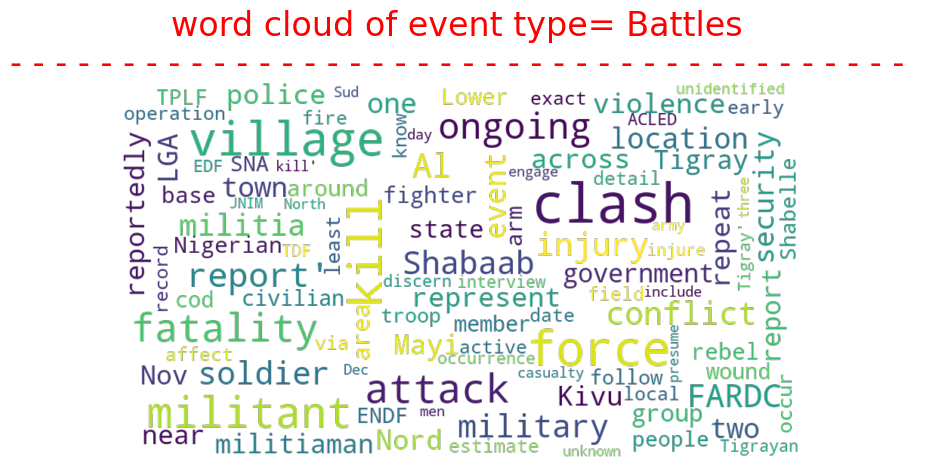

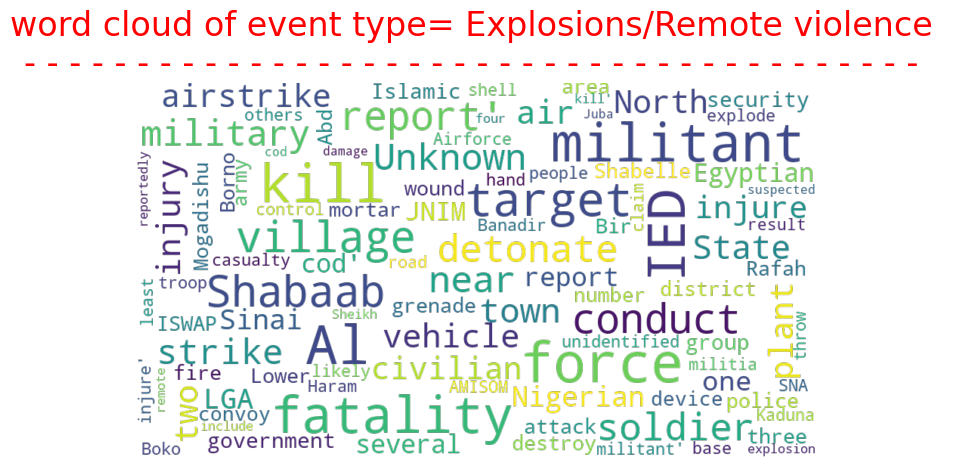

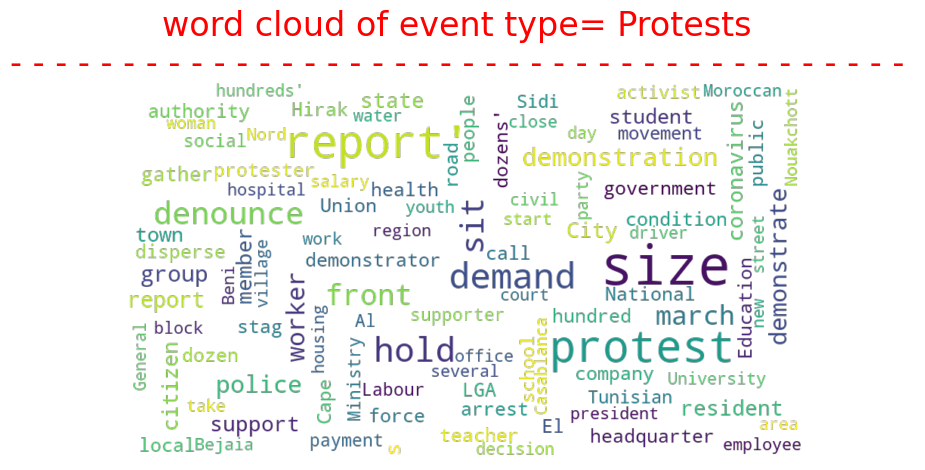

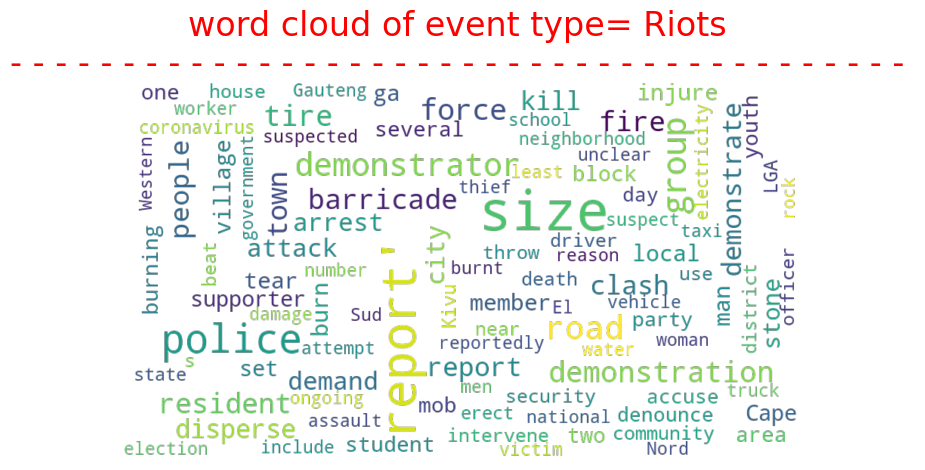

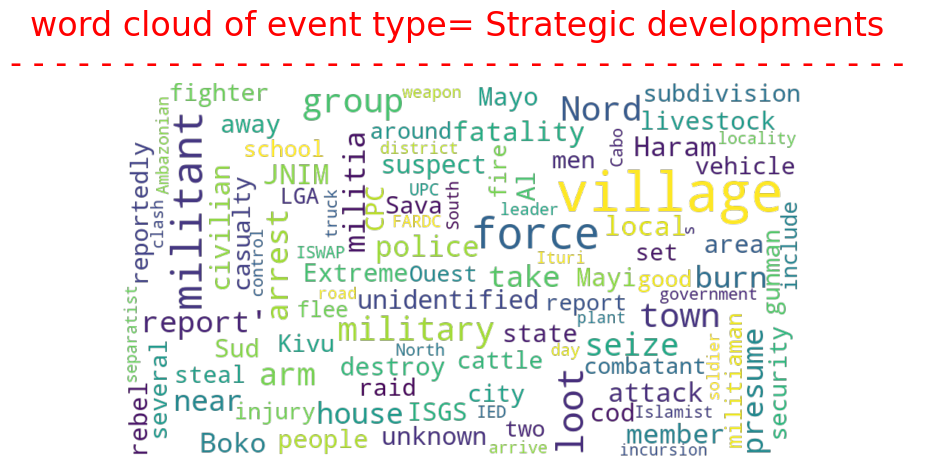

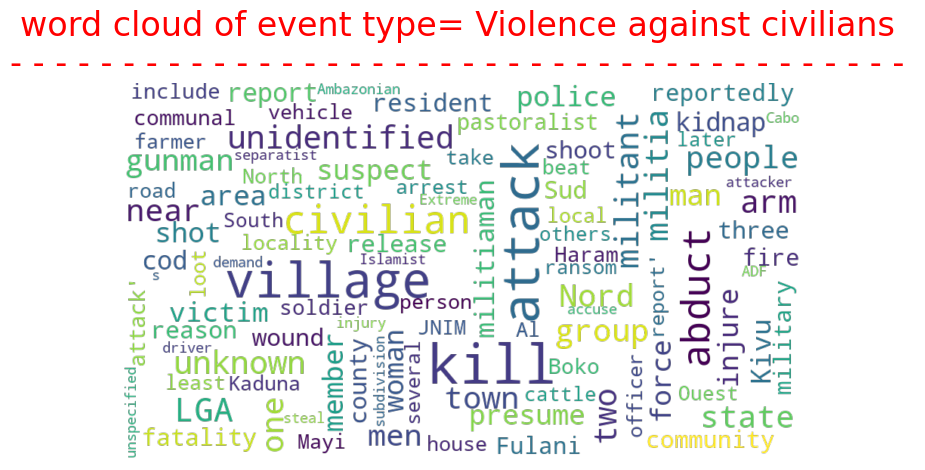

In [158]:

for k in event_type_notes.keys():
    
    text="".join(str(event_type_notes[k]))

    wc = WordCloud(width=900, height=500, 
                   mode='RGBA', background_color=None,
                   min_font_size=12,max_font_size=72,
                   collocations=False,prefer_horizontal=0.8,
                   max_words=100).generate(text)

    # show wordcloud img
    plt.figure(figsize=(9,5),dpi=100)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title("word cloud of event type= {} \n{}".format(k,'- '*40),fontsize=24,color='red')
    plt.show()
    print()

# 5. Modeling and Application <a class="anchor" id="5"></a>

Model 1: We are going to train a model that will predict the event type (target) of a particular event in a region (multi classification). This will be supervised learning as the input and output is already labelled. We are choosing the event type column to ensure that the model has no major errors in the data cleaning and wrangling process before continuing to more difficult models. Once we’ve established a working model, we would move to the next stage of the product.

Model 2 :We are going to train a model that will predict the sub-event type (target) of a particular event in a region (multi classification). Various features will be analyzed in an unsupervised fashion to identify any new clusters, and help determine the best predictor of the sub-event type. New features would include:
* Fatalities
* Region

Identifying new sub-event type clusters would increase the insights drawn from the notes and summary of each event. An example of this would identify gender based violence or violence against a minority class as a sub-event of Violence Against Civilians.

Types of Models
* Supervised Learning
    * Logistics Regression,
    * Random Forest 
    * Multinomial Naive Bayes, 

* Unsupervised Learning
    * Topic Modeling/LDA
    * K-Means

## 5.1 Model 1 - Classification Model <a class="anchor" id="5.1"></a>

The first model is an experimental model, testing the implementation of one model that we select, based on two kinds of events to reduce errors in testing and runtime.
* Protests
* Battles

### 5.1.1 Model 1 - Experimental Model with 2 Event Types <a class="anchor" id="5.1.1"></a>

In [146]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

# from sklearn.naive_bayes import MultinomialNB
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,auc,accuracy_score,f1_score
from sklearn.model_selection import GridSearchCV

In [147]:
# Define two functions that will be used later in the drawing

def plotConfusionMaxtrix(confmat_data=None,xlabel='',ylabel='',title='',cmap=plt.cm.Blues,plt_ax=None):
    """
    Used for drawing - confusion matrix
    """
    plt_ax.matshow(confmat_data, cmap=cmap, alpha=0.75)
    for i in range(confmat_data.shape[0]):
        for j in range(confmat_data.shape[1]):
            plt_ax.text(x=j, y=i,s=confmat_data[i, j],va='center', ha='center',fontsize=12)
    plt_ax.set_xlabel(xlabel,fontsize=12)
    plt_ax.set_ylabel(ylabel,fontsize=12)
    plt_ax.set_title(title,fontsize=12)
    return 


def plotRocBinary(fpr=None,tpr=None,roc_auc=None,color='red',title='',plot_ax=None):
    plot_ax.plot(fpr, tpr, c=color,linewidth=2,label='ROC Curve (auc = %0.3f)' % roc_auc)
    plot_ax.plot([0, 1], [0, 1], 'k--',label='Random Prediction')
    plot_ax.set_xlim([0.0, 1.0])
    plot_ax.set_ylim([0.0, 1.0])
    plot_ax.set_xlabel('1 - Specifity',fontsize=12)
    plot_ax.set_ylabel('Sensitivity',fontsize=12)
    plot_ax.set_title(title,fontsize=12)
    for key in ["left","right","top","bottom"]:
        plot_ax.spines[key].set_alpha(0.3)
    plot_ax.legend(loc="lower right")
    return

In [148]:
# perpare x and y 
data_model=data_sub[data_sub["event_type"].isin(["Protests","Battles"])][["notes","event_type"]]
x=data_model["notes"]
y=data_model["event_type"].map({"Protests":0,"Battles":1})

# split train set and test set
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

In [149]:
# Extract text features using TFIDF

vectorizer = TfidfVectorizer(min_df=3,max_df=0.3)
xtrain_vectorizer=vectorizer.fit_transform(xtrain)
xtest_vectorizer =vectorizer.transform(xtest)

In [150]:
# Random forest was used as the classification model, and the super parameters were adjusted to make the model best

rf=RandomForestClassifier(random_state=42)

# set tune parameter
parameters = {'max_depth': range(3,51)}

grid_rf = GridSearchCV(rf, parameters,cv=5, n_jobs=-1)
grid_rf.fit(xtrain_vectorizer,ytrain)

# The optimal depth is 38
print("best_params: ",grid_rf.best_params_)

best_params:  {'max_depth': 38}


In [151]:
# Look at the model's classification report on training data and test data

pred_ytrain_grid_rf=grid_rf.predict(xtrain_vectorizer)
pred_ytest_grid_rf=grid_rf.predict(xtest_vectorizer)

proba_ytrain_grid_rf=grid_rf.predict_proba(xtrain_vectorizer)
proba_ytest_grid_rf=grid_rf.predict_proba(xtest_vectorizer)

print("="*60)
print(" "*5,"Train Data Classification Report")
print(classification_report(ytrain,pred_ytrain_grid_rf))
print("="*60)

print(" "*5,"Test Data Classification Report")
print(classification_report(ytest,pred_ytest_grid_rf))
print("="*60)

      Train Data Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8036
           1       1.00      1.00      1.00      5255

    accuracy                           1.00     13291
   macro avg       1.00      1.00      1.00     13291
weighted avg       1.00      1.00      1.00     13291

      Test Data Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3504
           1       0.99      0.99      0.99      2193

    accuracy                           1.00      5697
   macro avg       1.00      1.00      1.00      5697
weighted avg       1.00      1.00      1.00      5697



### 5.1.2 Model 1 - 6 Event Types <a class="anchor" id="5.1.2"></a>

In [162]:
# A function that defines the ROC of a multi-classification problem The ROC of multi-classification is not the same as the ROC of dichotomies

def plotRocMulti(fpr=None,tpr=None,roc_auc=None,title='',plot_ax=None):
    # plot Roc for each category
    colors=['peru','darkcyan','cyan','purple','red','blue']
    for i, color in zip(range(6), colors):
        plot_ax.plot(fpr[i], tpr[i], color=color, lw=2,label='ROC curve of Class:{0}(auc = {1:0.3f})'.format(i, roc_auc[i]))

    plot_ax.plot([0, 1], [0, 1], 'k--', lw=1)
    plot_ax.set_xlim([0.0, 1.0])
    plot_ax.set_ylim([0.0, 1.0])
    plot_ax.set_xlabel('1 - Specifity',fontsize=12)
    plot_ax.set_ylabel('Sensitivity',fontsize=12)
    plot_ax.set_title(title,fontsize=12)
    for key in ["left","right","top","bottom"]:
        plot_ax.spines[key].set_alpha(0.3)
    plot_ax.legend(loc="lower right")
    return

In [163]:
# Extract text features using TFIDF

vectorizer6 = TfidfVectorizer(min_df=3,max_df=0.3)
xtrain_vectorizer6=vectorizer6.fit_transform(xtrain)
xtest_vectorizer6 =vectorizer6.transform(xtest)

In [164]:
# Random forest was used as the classification model, and the super parameters were adjusted to make the model best

rf=RandomForestClassifier(random_state=42)

# set tune parameter
parameters = {'max_depth': range(5,101,2)}

grid_rf6 = GridSearchCV(rf, parameters,cv=5, n_jobs=-1)
grid_rf6.fit(xtrain_vectorizer6,ytrain)

# The optimal depth is 97
print("best_params: ",grid_rf6.best_params_)

best_params:  {'max_depth': 97}


In [165]:
# Look at the model's classification report on training data and test data

pred_ytrain_grid_rf6=grid_rf6.predict(xtrain_vectorizer6)
pred_ytest_grid_rf6=grid_rf6.predict(xtest_vectorizer6)

print("="*60)
print(" "*5,"Train Data Classification Report")
print(classification_report(ytrain,pred_ytrain_grid_rf6))
print("="*60)

print(" "*5,"Test Data Classification Report")
print(classification_report(ytest,pred_ytest_grid_rf6))
print("="*60)

      Train Data Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8016
           1       1.00      1.00      1.00      5240
           2       1.00      1.00      1.00      5002
           3       1.00      1.00      1.00      2756
           4       1.00      1.00      1.00      1258
           5       1.00      1.00      1.00      1092

    accuracy                           1.00     23364
   macro avg       1.00      1.00      1.00     23364
weighted avg       1.00      1.00      1.00     23364

      Test Data Classification Report
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      3524
           1       0.90      0.93      0.92      2208
           2       0.83      0.94      0.88      2139
           3       0.94      0.77      0.85      1172
           4       0.93      0.52      0.67       520
           5       0.93      0.82      0.87       451



In [166]:
# perpare x and y 
data_model_6=data_sub[["notes","event_type"]].copy()
x=data_model_6["notes"]
y=data_model_6["event_type"].map({"Protests":0,
                                  "Battles":1,
                                  "Violence against civilians":2,
                                  "Riots":3,
                                  "Strategic developments":4,
                                  "Explosions/Remote violence":5})

# split train set and test set
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

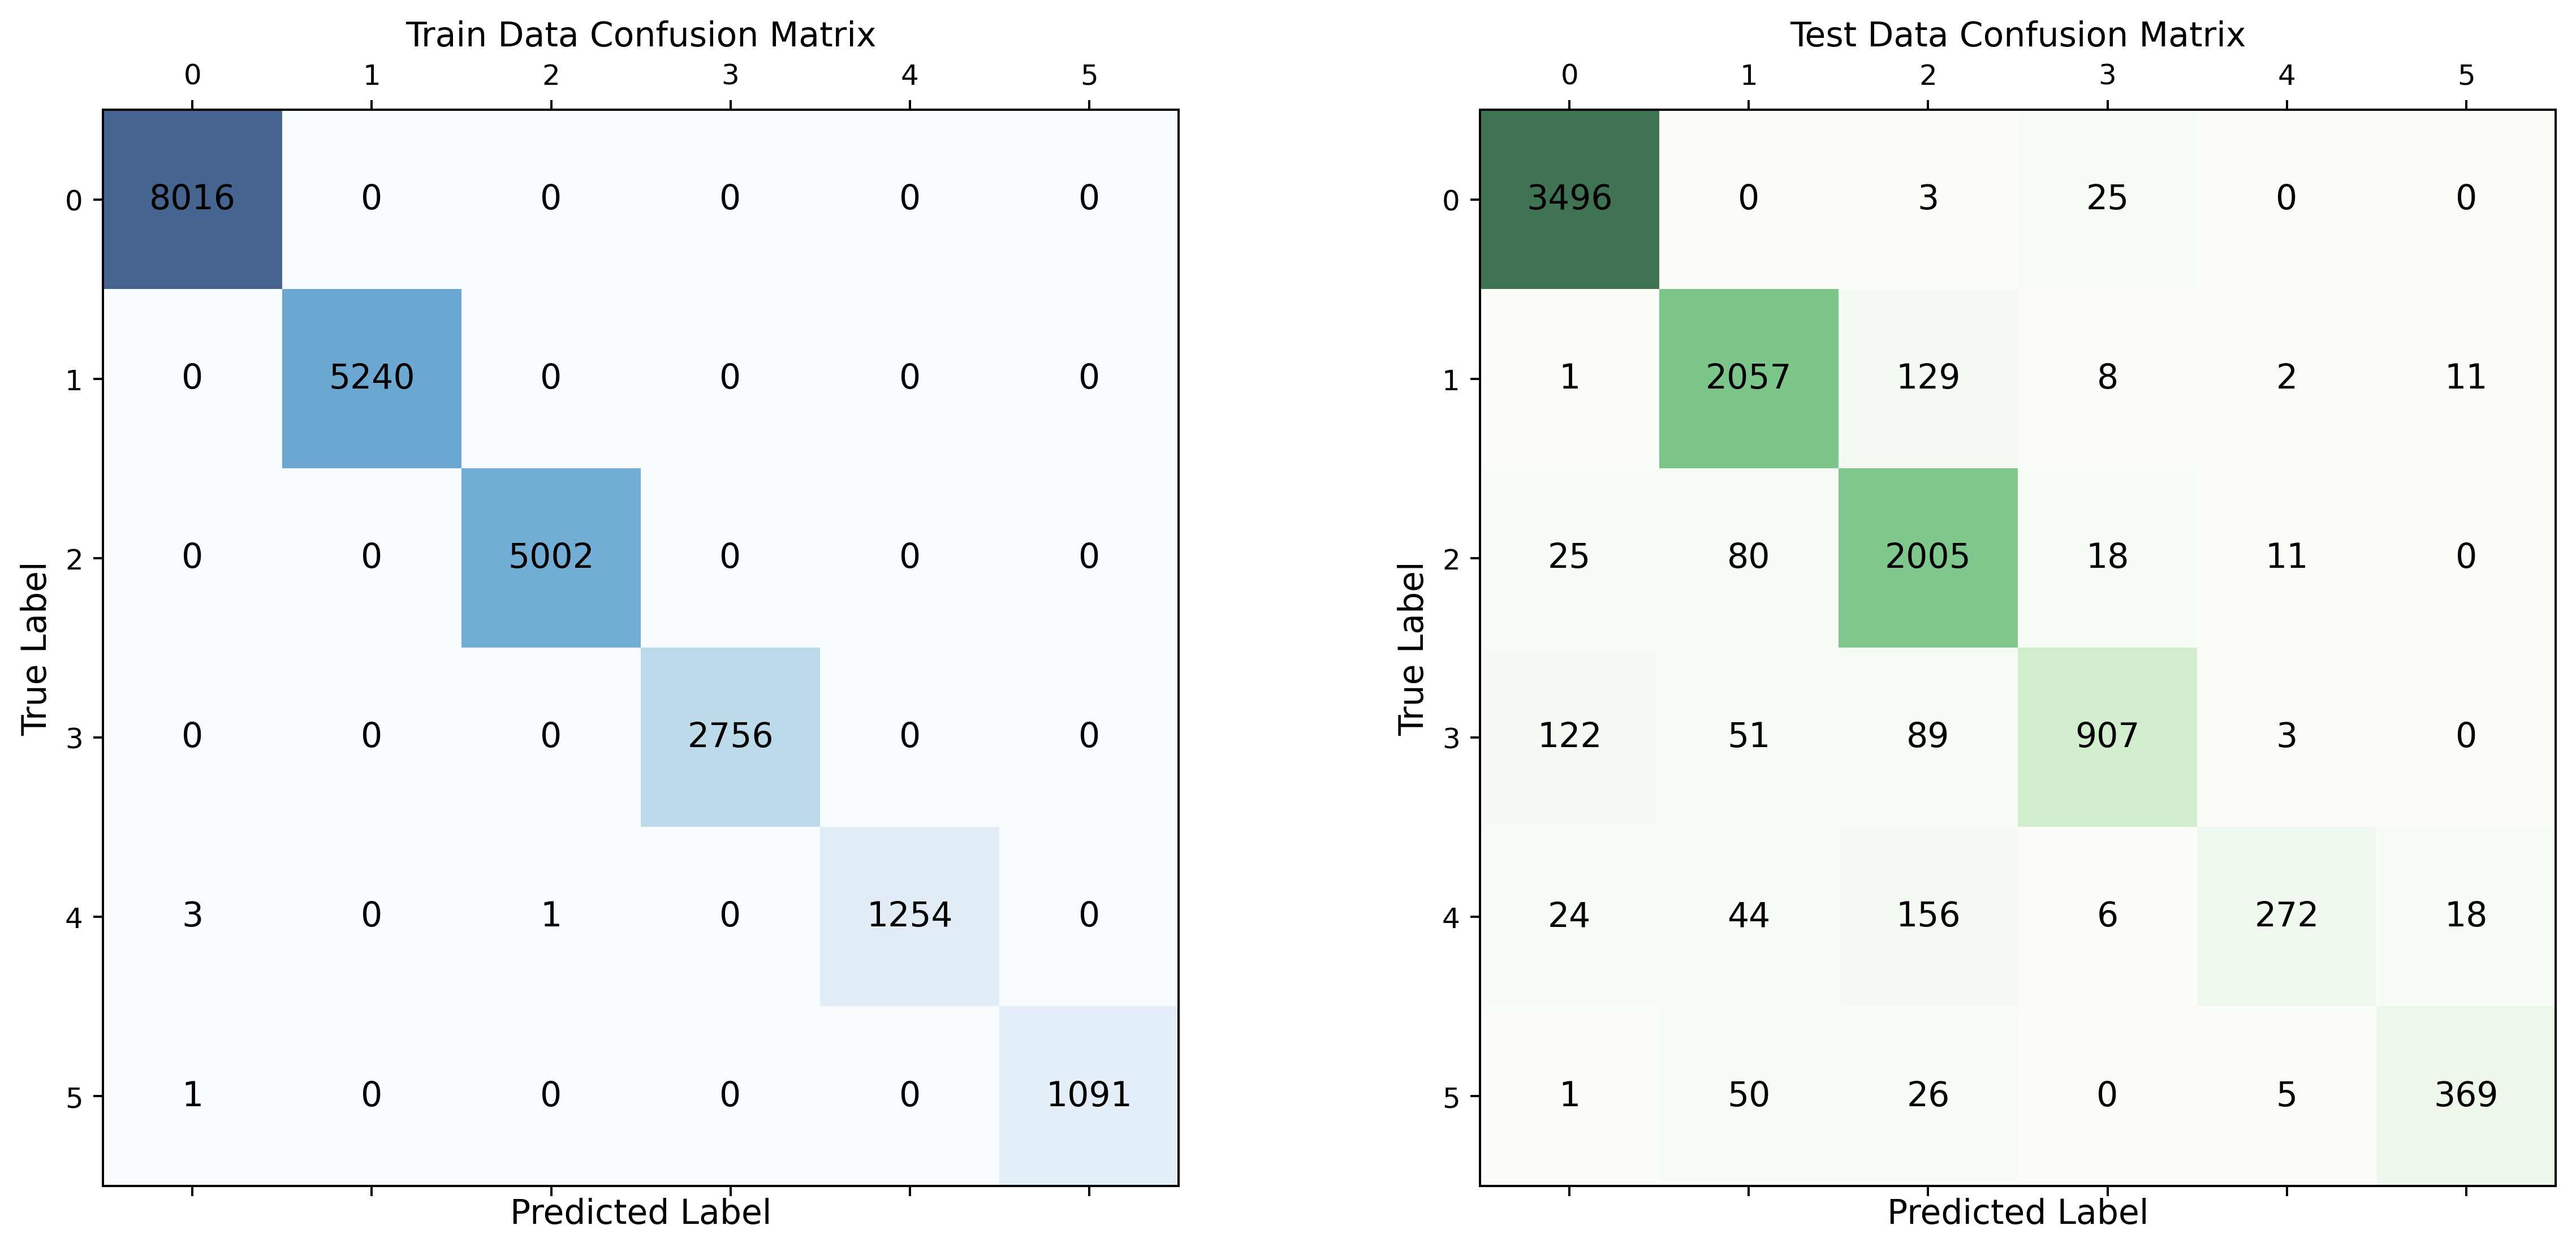

In [167]:
# Visualize the confusion matrix

confmat_train6 = confusion_matrix(y_true=ytrain, y_pred=pred_ytrain_grid_rf6)
confmat_test6 = confusion_matrix(y_true=ytest, y_pred=pred_ytest_grid_rf6)

# Plot Confusion Matrix
fig, (ax1, ax2) = plt.subplots(nrows=1,ncols=2,figsize=(16, 7))
#plot for train data
plotConfusionMaxtrix(confmat_data=confmat_train6,
                     xlabel='Predicted Label',
                     ylabel='True Label',
                     title='Train Data Confusion Matrix',
                     cmap=plt.cm.Blues,
                     plt_ax=ax1)
#plot for test data
plotConfusionMaxtrix(confmat_data=confmat_test6,
                     xlabel='Predicted Label',
                     ylabel='True Label',
                     title='Test Data Confusion Matrix',
                     cmap=plt.cm.Greens,
                     plt_ax=ax2)
plt.show()

In [168]:
# Look at the model's classification report on training data and test data

pred_ytrain_grid_rf6=grid_rf6.predict(xtrain_vectorizer6)
pred_ytest_grid_rf6=grid_rf6.predict(xtest_vectorizer6)

print("="*60)
print(" "*5,"Train Data Classification Report")
print(classification_report(ytrain,pred_ytrain_grid_rf6))
print("="*60)

print(" "*5,"Test Data Classification Report")
print(classification_report(ytest,pred_ytest_grid_rf6))
print("="*60)

      Train Data Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8016
           1       1.00      1.00      1.00      5240
           2       1.00      1.00      1.00      5002
           3       1.00      1.00      1.00      2756
           4       1.00      1.00      1.00      1258
           5       1.00      1.00      1.00      1092

    accuracy                           1.00     23364
   macro avg       1.00      1.00      1.00     23364
weighted avg       1.00      1.00      1.00     23364

      Test Data Classification Report
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      3524
           1       0.90      0.93      0.92      2208
           2       0.83      0.94      0.88      2139
           3       0.94      0.77      0.85      1172
           4       0.93      0.52      0.67       520
           5       0.93      0.82      0.87       451



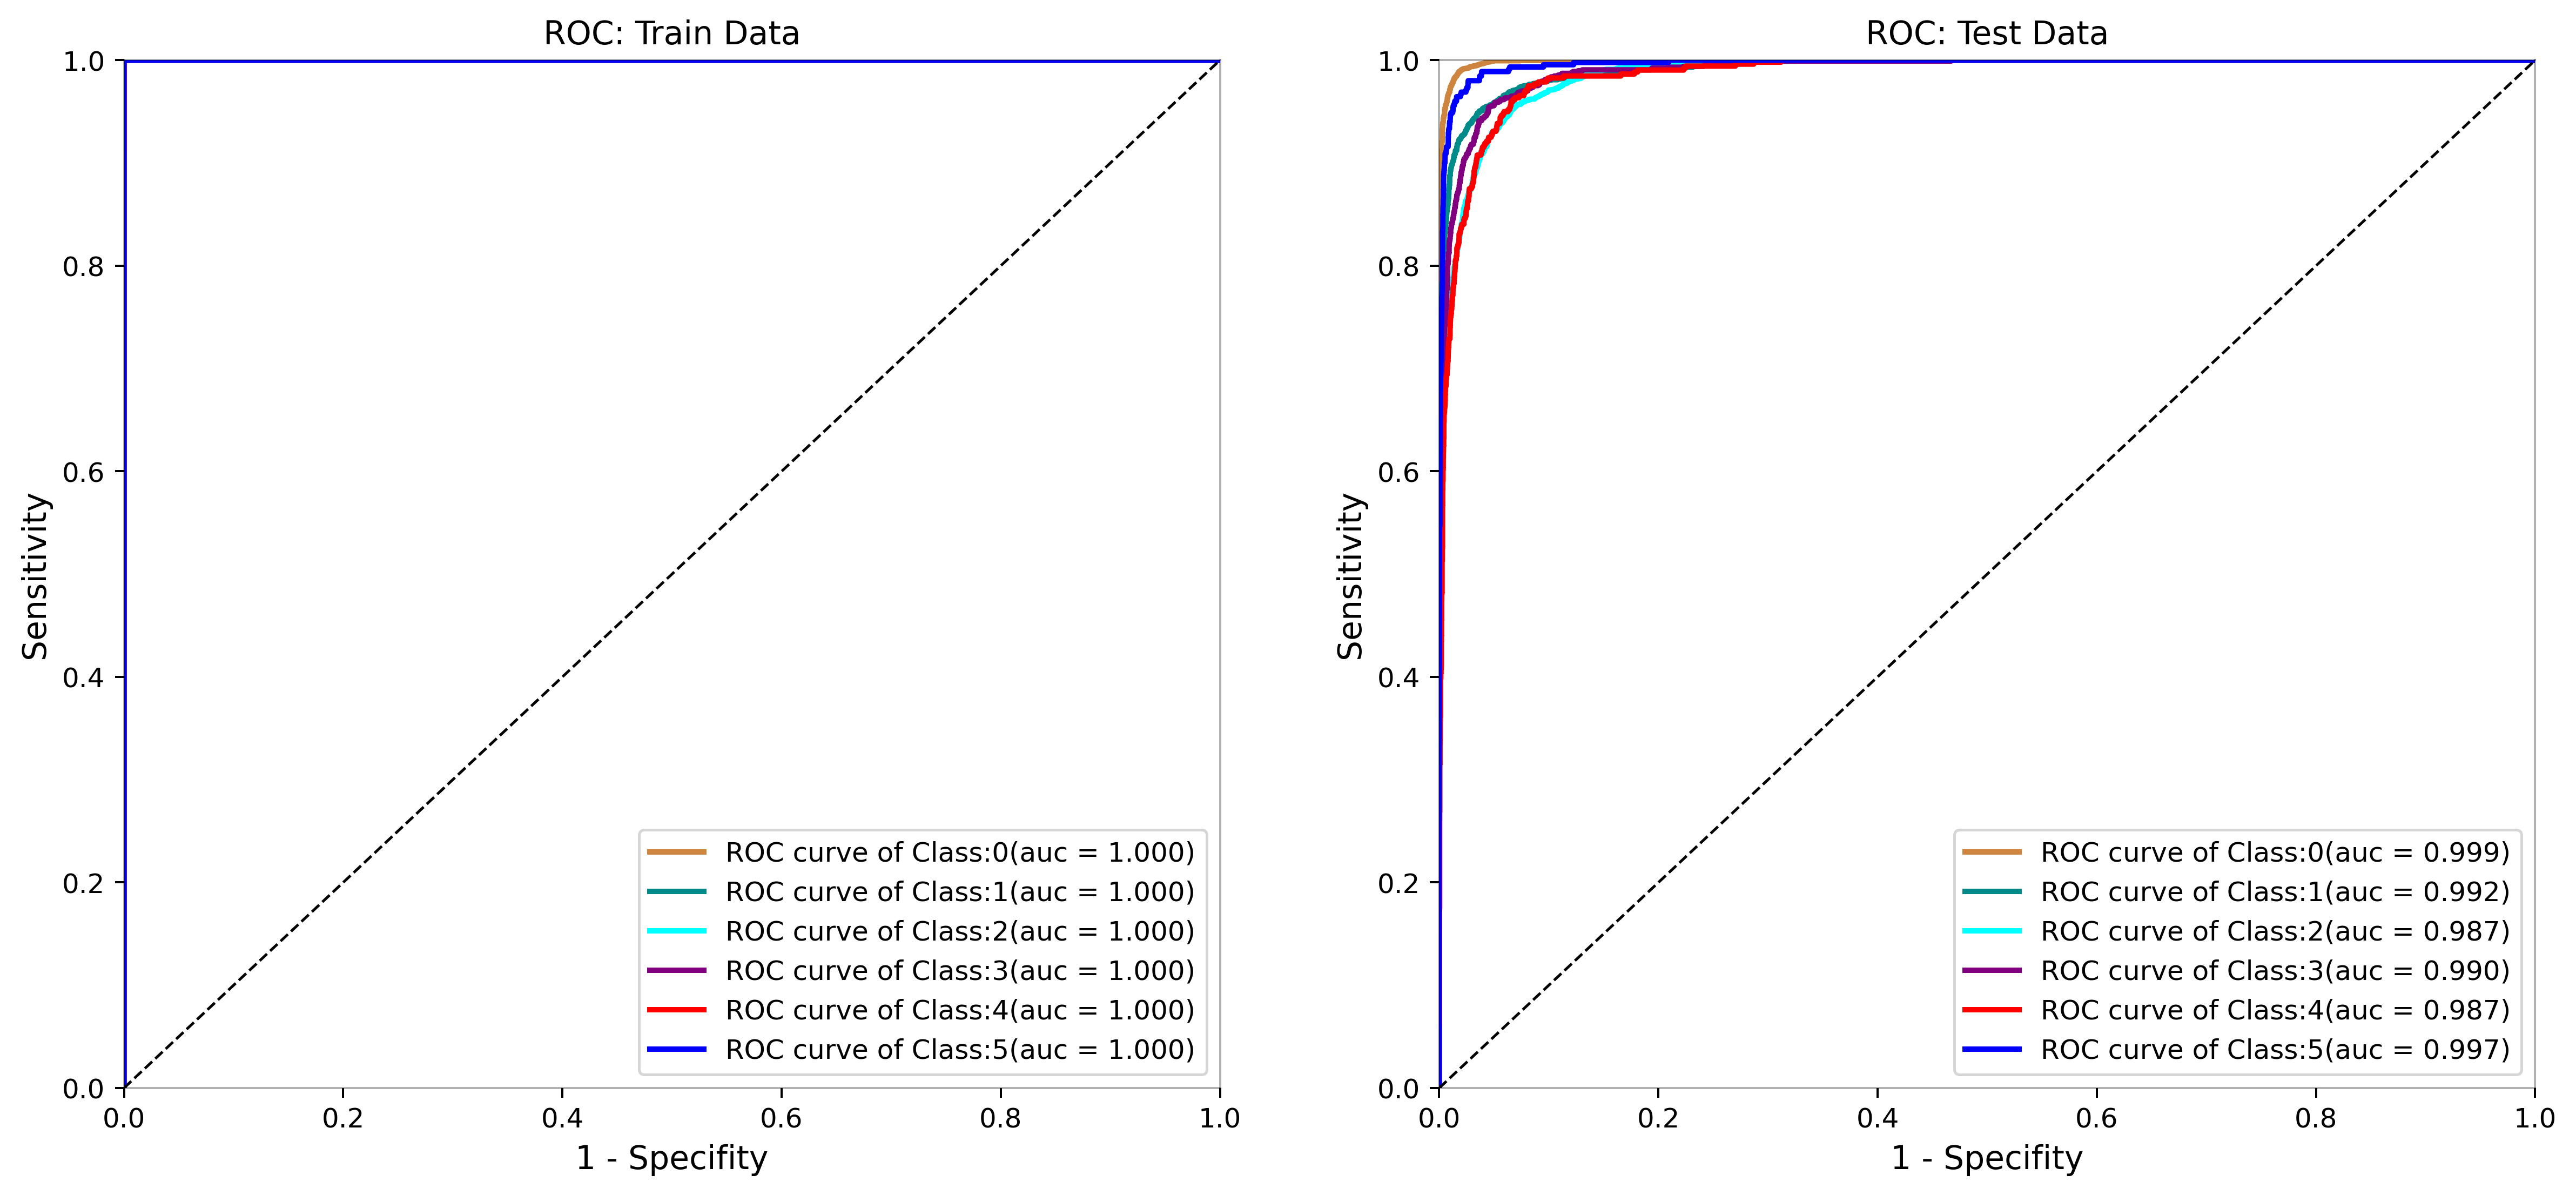

In [169]:
from sklearn.preprocessing import label_binarize

proba_ytrain_grid_rf6=grid_rf6.predict_proba(xtrain_vectorizer6)
proba_ytest_grid_rf6=grid_rf6.predict_proba(xtest_vectorizer6)

# Training data ROC
train_fpr = dict()
train_tpr = dict()
train_roc_auc = dict()
ytrain_bin = label_binarize(ytrain, classes=[0, 1, 2,3,4,5])
# Calculate the FPR TPR AUC for each category
for i in range(6):
    train_fpr[i], train_tpr[i], _ = roc_curve(ytrain_bin[:, i], proba_ytrain_grid_rf6[:, i])
    train_roc_auc[i] = auc(train_fpr[i], train_tpr[i])
    
# Test the ROC of data
test_fpr = dict()
test_tpr = dict()
test_roc_auc = dict()
ytest_bin = label_binarize(ytest, classes=[0, 1, 2,3,4,5])
# Calculate the FPR TPR AUC for each category
for i in range(6):
    test_fpr[i], test_tpr[i], _ = roc_curve(ytest_bin[:, i], proba_ytest_grid_rf6[:, i])
    test_roc_auc[i] = auc(test_fpr[i], test_tpr[i])
    
# draw
fig, (ax1, ax2) = plt.subplots(nrows=1,ncols=2,figsize=(16, 7))
plotRocMulti(fpr=train_fpr,tpr=train_tpr,roc_auc=train_roc_auc,title='ROC: Train Data',plot_ax=ax1)
plotRocMulti(fpr=test_fpr,tpr=test_tpr,roc_auc=test_roc_auc,title='ROC: Test Data',plot_ax=ax2)

### 5.1.3 Model 1 - 6 Event Types with Random Drop Sampling <a class="anchor" id="5.1.3"></a>

In [ ]:
# imblearn Used to deal with unbalanced sample problems

from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [ ]:
# Visualize the confusion matrix

confmat_train_pipe = confusion_matrix(y_true=ytrain, y_pred=pred_ytrain_grid_rf_pipe)
confmat_test_pipe = confusion_matrix(y_true=ytest, y_pred=pred_ytest_grid_rf_pipe)

# Plot Confusion Matrix
fig, (ax1, ax2) = plt.subplots(nrows=1,ncols=2,figsize=(16, 7))
#plot for train data
plotConfusionMaxtrix(confmat_data=confmat_train_pipe,
                     xlabel='Predicted Label',
                     ylabel='True Label',
                     title='Train Data Confusion Matrix',
                     cmap=plt.cm.Blues,
                     plt_ax=ax1)
#plot for test data
plotConfusionMaxtrix(confmat_data=confmat_test_pipe,
                     xlabel='Predicted Label',
                     ylabel='True Label',
                     title='Test Data Confusion Matrix',
                     cmap=plt.cm.Greens,
                     plt_ax=ax2)
plt.show()

In [ ]:
# Look at the model's classification report on training data and test data

pred_ytrain_grid_rf_pipe=grid_rf_pipe.predict(xtrain_vectorizer6)
pred_ytest_grid_rf_pipe=grid_rf_pipe.predict(xtest_vectorizer6)

proba_ytrain_grid_rf_pipe=grid_rf_pipe.predict_proba(xtrain_vectorizer6)
proba_ytest_grid_rf_pipe=grid_rf_pipe.predict_proba(xtest_vectorizer6)

print("="*60)
print(" "*5,"Train Data Classification Report")
print(classification_report(ytrain,pred_ytrain_grid_rf_pipe))
print("="*60)

print(" "*5,"Test Data Classification Report")
print(classification_report(ytest,pred_ytest_grid_rf_pipe))
print("="*60)

In [ ]:

# A balanced sample training model is constructed by random falling sampling

# The first step in building a pipeline is to do random drop sampling and the second step is classifier
rf_pipe = Pipeline(
    [
        ('sampling', RandomUnderSampler(random_state=42)),
        ('classifier', RandomForestClassifier(random_state=42))   
    ])

# search for best parameters by GridSearchCV
parameters = {'classifier__max_depth': range(5,101,2)}

grid_rf_pipe = GridSearchCV(rf_pipe, parameters,cv=5,n_jobs=-1)
grid_rf_pipe.fit(xtrain_vectorizer6,ytrain)

# The optimal depth is 95
print("best_params: ",grid_rf_pipe.best_params_)

In [ ]:
# Predict the probability of each class of events
proba_ytrain_grid_rf_pipe=grid_rf_pipe.predict_proba(xtrain_vectorizer6)
proba_ytest_grid_rf_pipe=grid_rf_pipe.predict_proba(xtest_vectorizer6)

# Training data ROC
train_fpr = dict()
train_tpr = dict()
train_roc_auc = dict()
ytrain_bin = label_binarize(ytrain, classes=[0, 1, 2,3,4,5])
# Calculate the FPR TPR AUC for each category
for i in range(6):
    train_fpr[i], train_tpr[i], _ = roc_curve(ytrain_bin[:, i], proba_ytrain_grid_rf_pipe[:, i])
    train_roc_auc[i] = auc(train_fpr[i], train_tpr[i])
    
# Test the ROC of data
test_fpr = dict()
test_tpr = dict()
test_roc_auc = dict()
ytest_bin = label_binarize(ytest, classes=[0, 1, 2,3,4,5])
# Calculate the FPR TPR AUC for each category
for i in range(6):
    test_fpr[i], test_tpr[i], _ = roc_curve(ytest_bin[:, i], proba_ytest_grid_rf_pipe[:, i])
    test_roc_auc[i] = auc(test_fpr[i], test_tpr[i])
    
# draw
fig, (ax1, ax2) = plt.subplots(nrows=1,ncols=2,figsize=(16, 7))
plotRocMulti(fpr=train_fpr,tpr=train_tpr,roc_auc=train_roc_auc,title='ROC: Train Data',plot_ax=ax1)
plotRocMulti(fpr=test_fpr,tpr=test_tpr,roc_auc=test_roc_auc,title='ROC: Test Data',plot_ax=ax2)

### 5.1.4 Model 1 - Multiple Model Selection Testing

In [170]:
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ClassPredictionError

from sklearn.pipeline import Pipeline


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

from sklearn.naive_bayes import MultinomialNB

In [171]:
X = data_sub["notes"].values
y_raw = data_sub["event_type"].values

# encoding our labels
encoder = LabelEncoder()
encoder.fit(y_raw)
y = encoder.transform(y_raw)
# if we want to go backwards and interpret what the numeric labels mean:
print(encoder.inverse_transform([0, 0, 1, 2]))

['Battles' 'Battles' 'Explosions/Remote violence' 'Protests']


In [172]:
vectorizers = [CountVectorizer(), TfidfVectorizer()]
algorithms = [RandomForestClassifier(), LogisticRegression(), MultinomialNB()] # add Naive Bayes Classifier also

In [173]:
def score_model(X, y, algorithm, vectorizer):
    """
    Test various estimators.
    """
    model = Pipeline([
        ('vectorizer', vectorizer),
        ('estimator', algorithm)
    ])

    # split the data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.33, random_state=42
    )
    
    # Instantiate the classification model and visualizer
    model.fit(X_train, y_train)

    expected  = y_test
    predicted = model.predict(X_test)

    # Compute and return F1 (harmonic mean of precision and recall)
    print("{}: {}".format(algorithm.__class__.__name__, f1_score(expected, predicted, average='micro')))

In [174]:
for algorithm in algorithms:
    for vectorizer in vectorizers:
        score_model(X, y, algorithm, vectorizer)

RandomForestClassifier: 0.9271901951883795
RandomForestClassifier: 0.9236495687698593


C:\Users\dhmph\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression: 0.9526100771674989


C:\Users\dhmph\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression: 0.9366318656377667
MultinomialNB: 0.8522015433499773
MultinomialNB: 0.8015433499773037


In [175]:
def visualize_model(X, y, algorithm, vectorizer):
    """
    Visually compare the models
    """
    model = Pipeline([
        ('vectorizer', vectorizer),
        ('estimator', algorithm)
    ])

    # Instantiate the classification model and visualizer
    visualizer = ClassificationReport(
        model, classes=encoder.classes_
    )
    
    # split the data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.33, random_state=42
    )
    
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    visualizer.show()

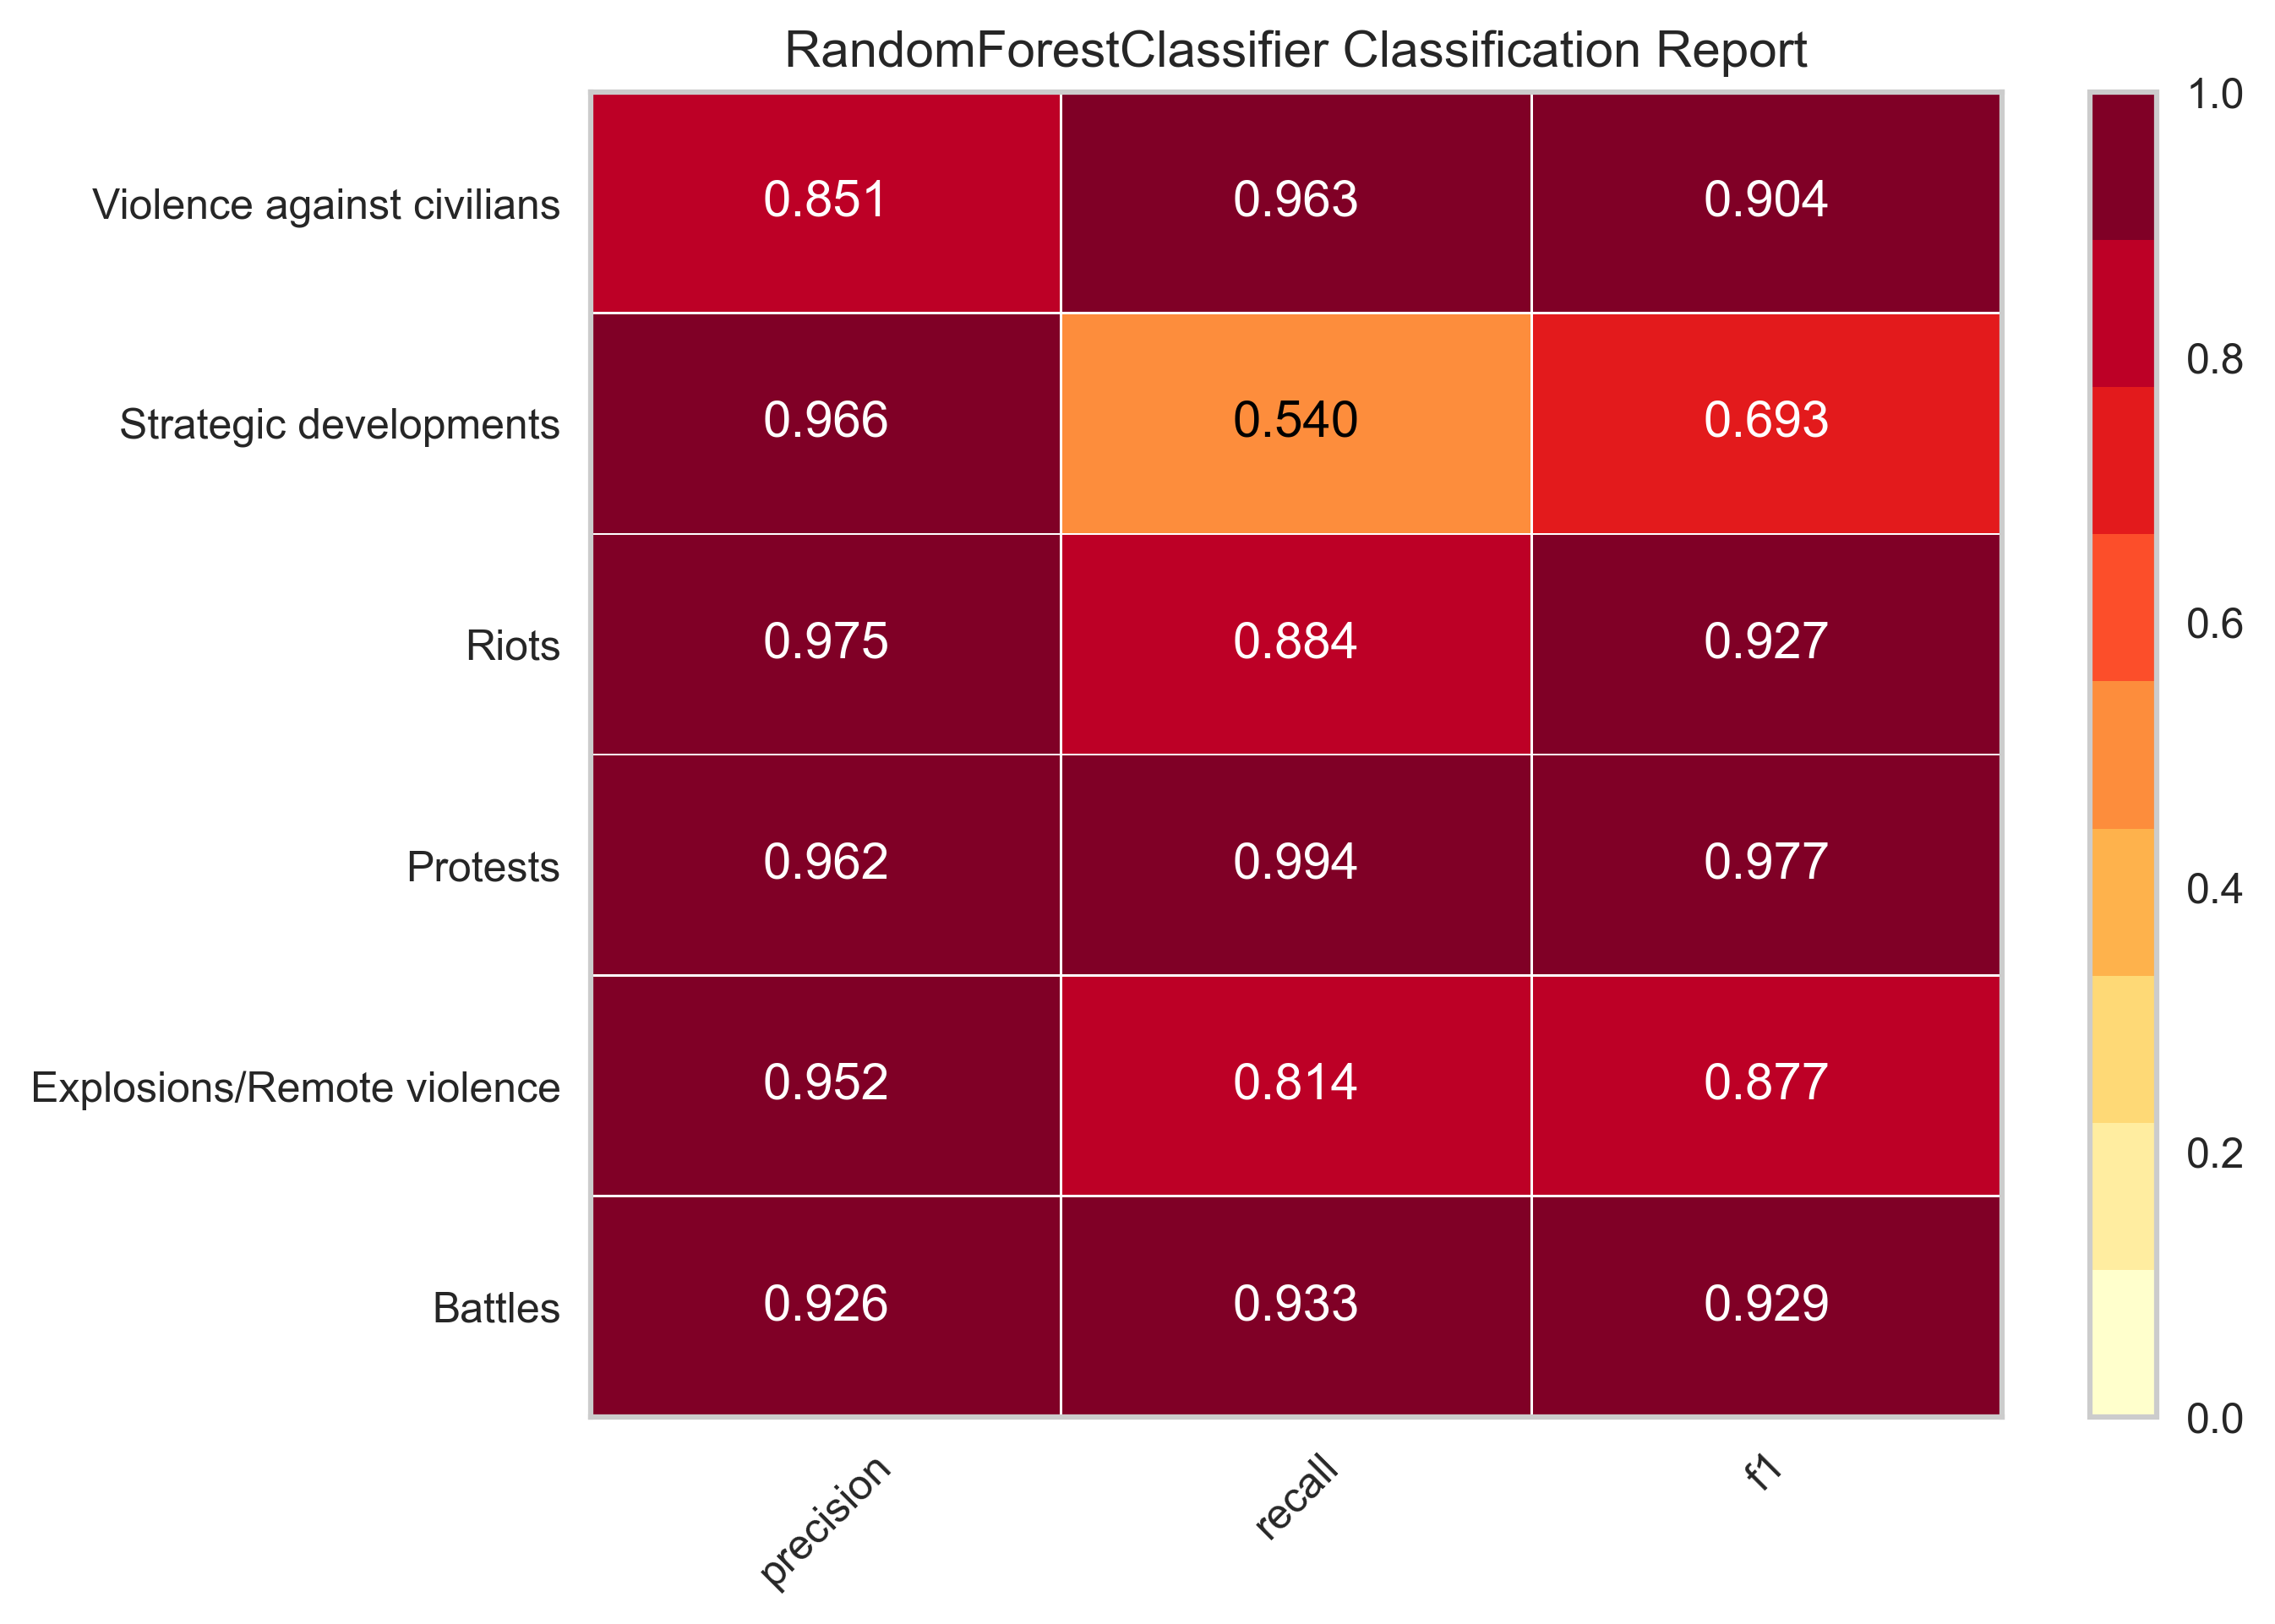

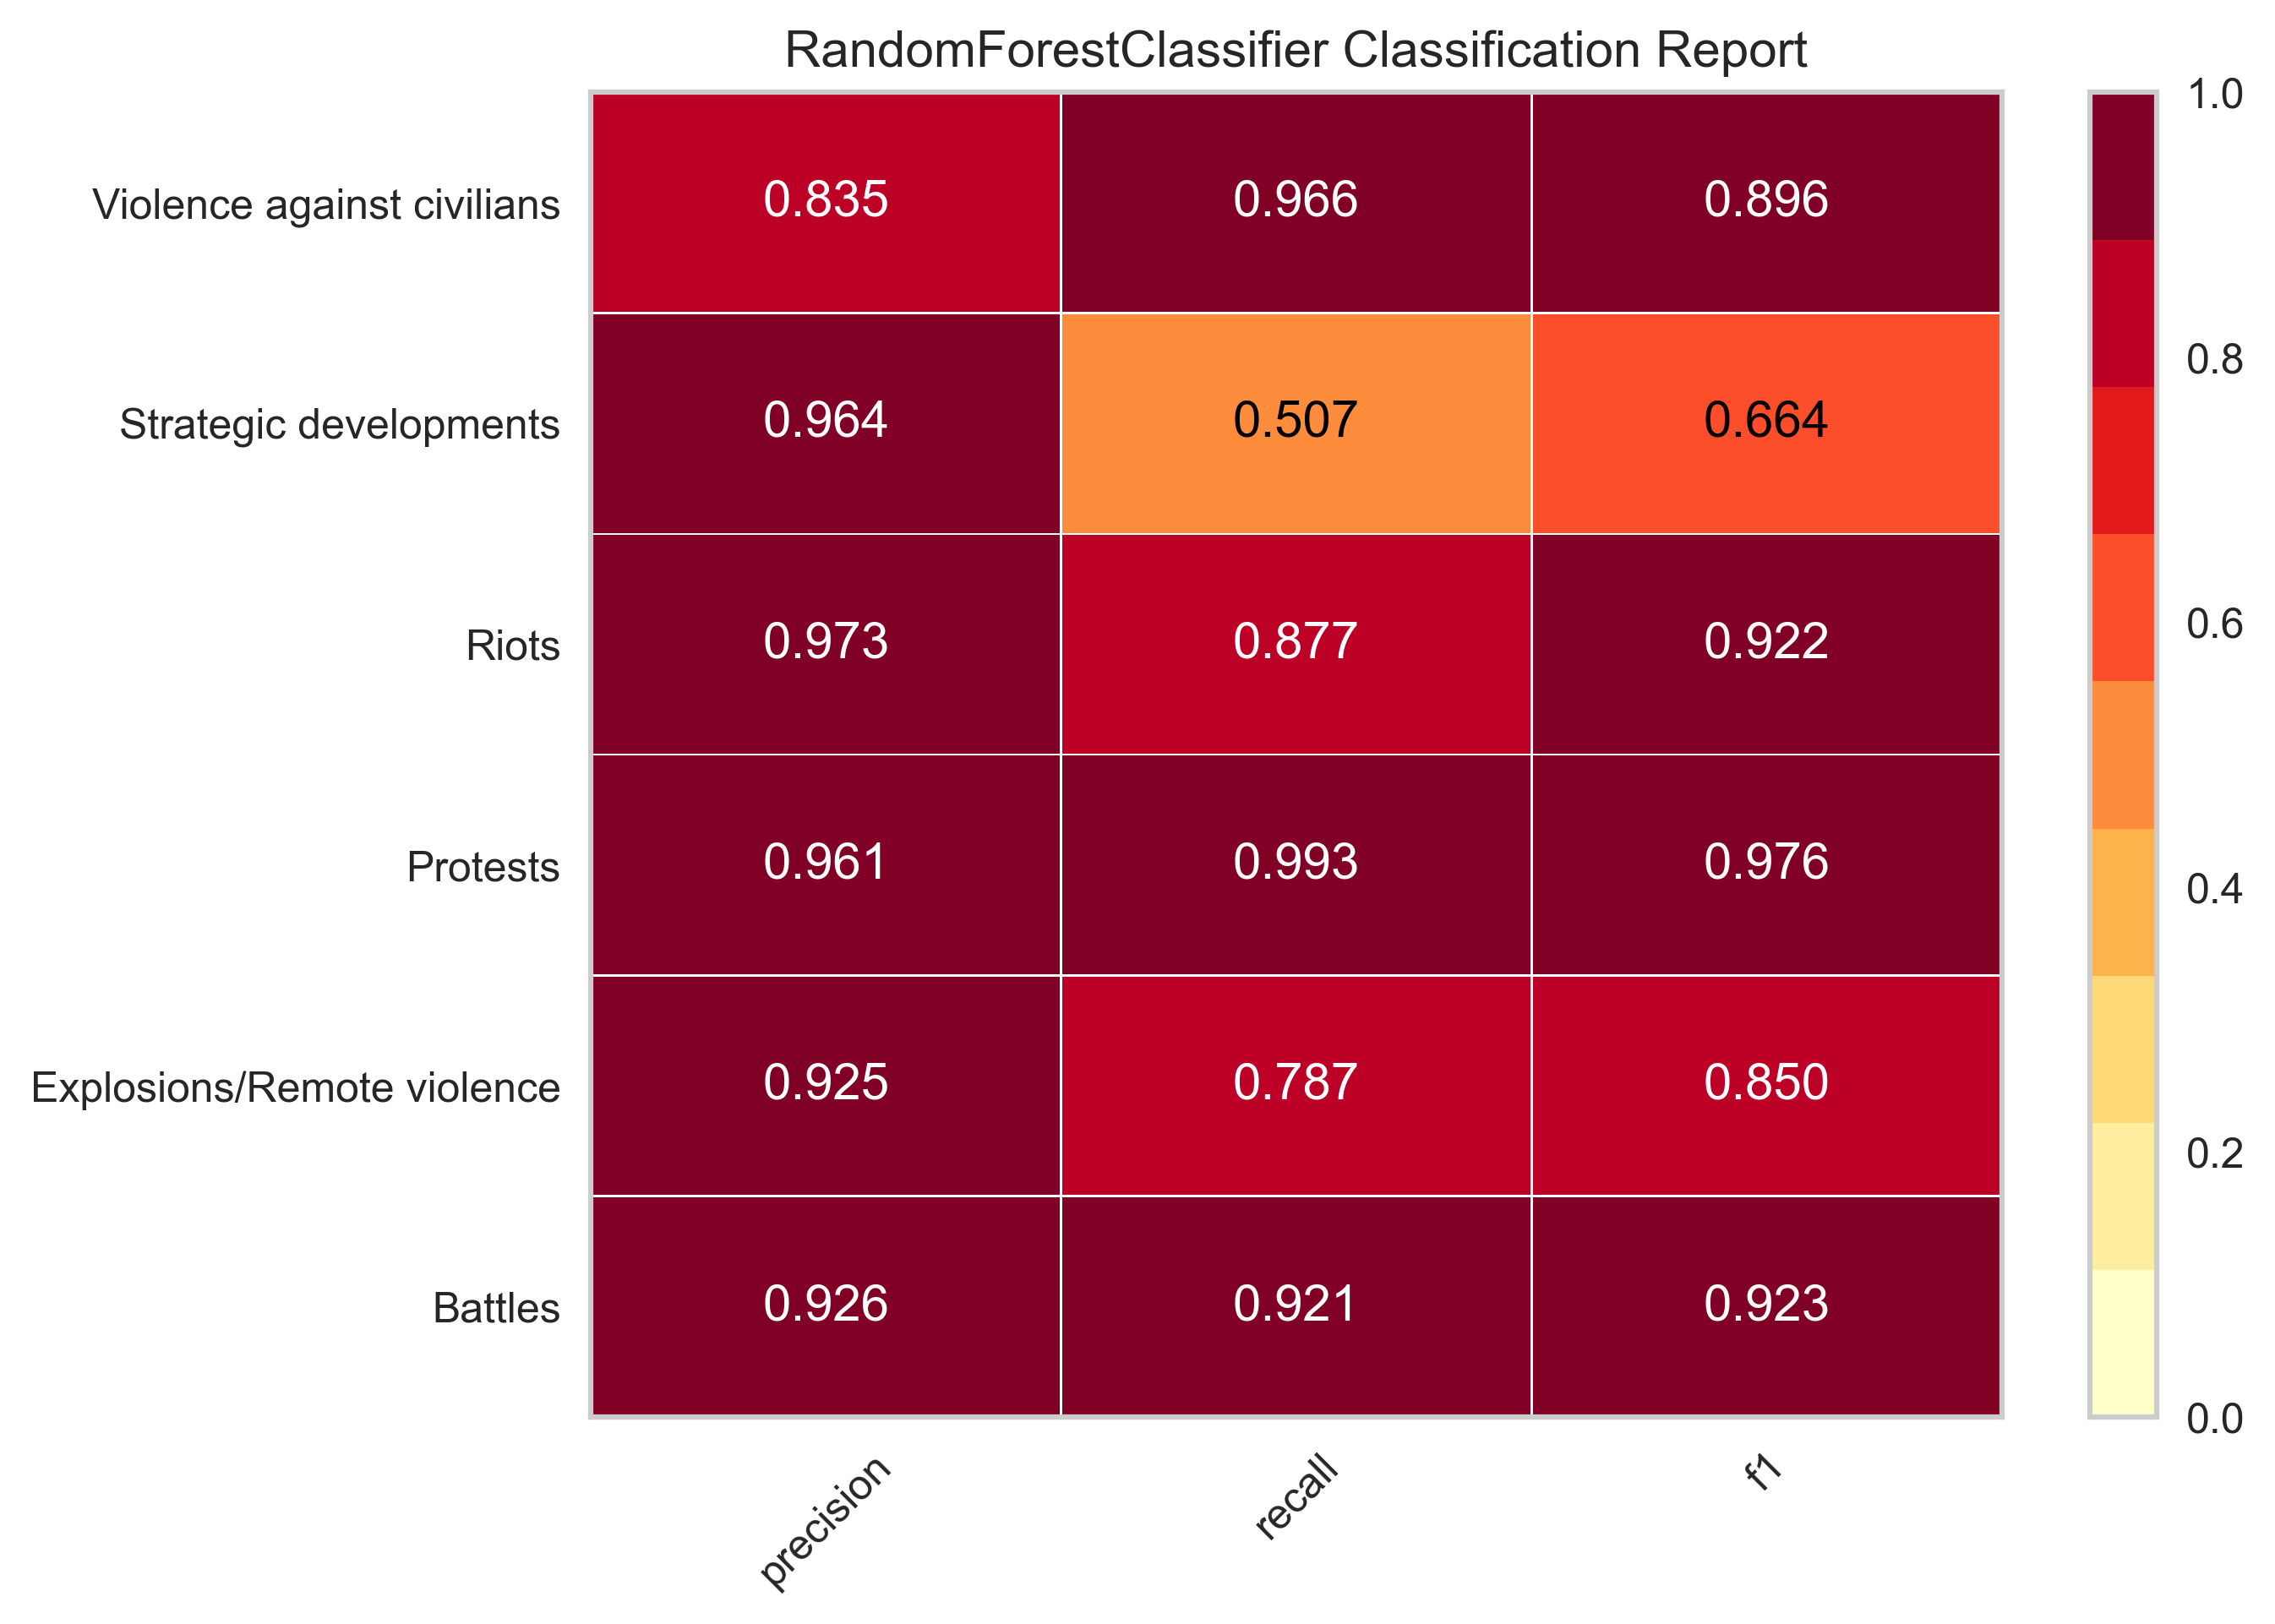

C:\Users\dhmph\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


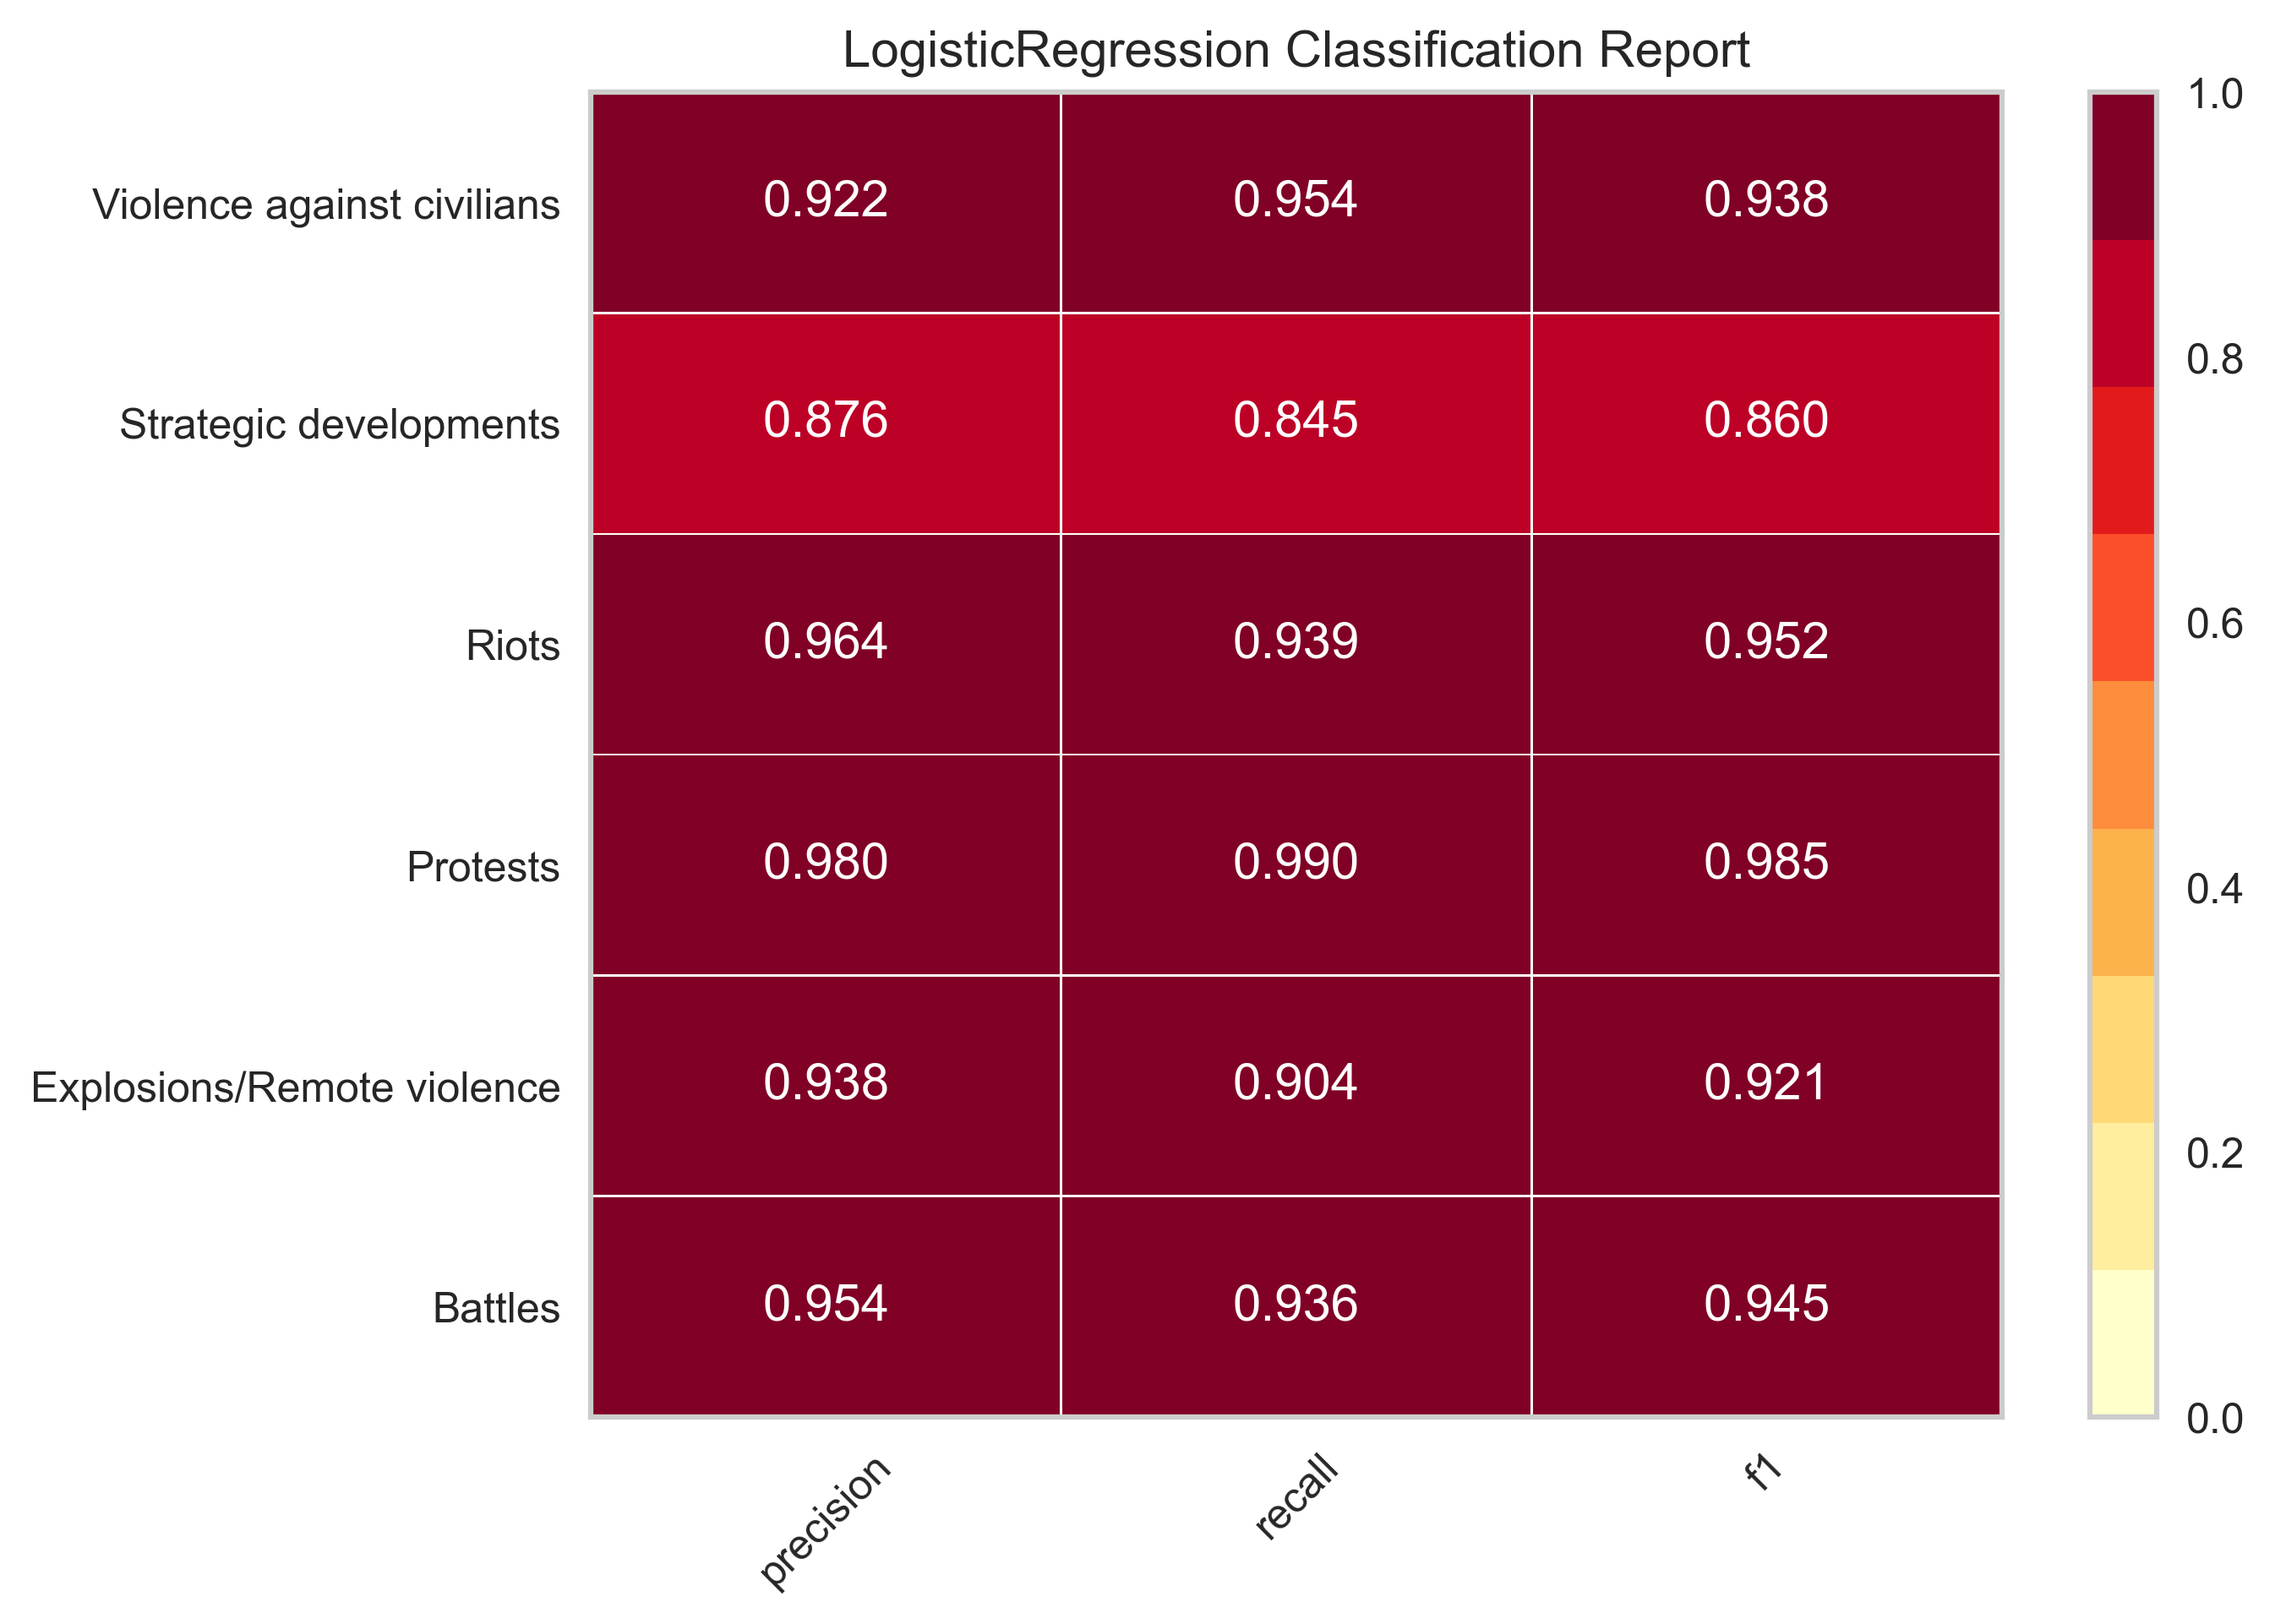

C:\Users\dhmph\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


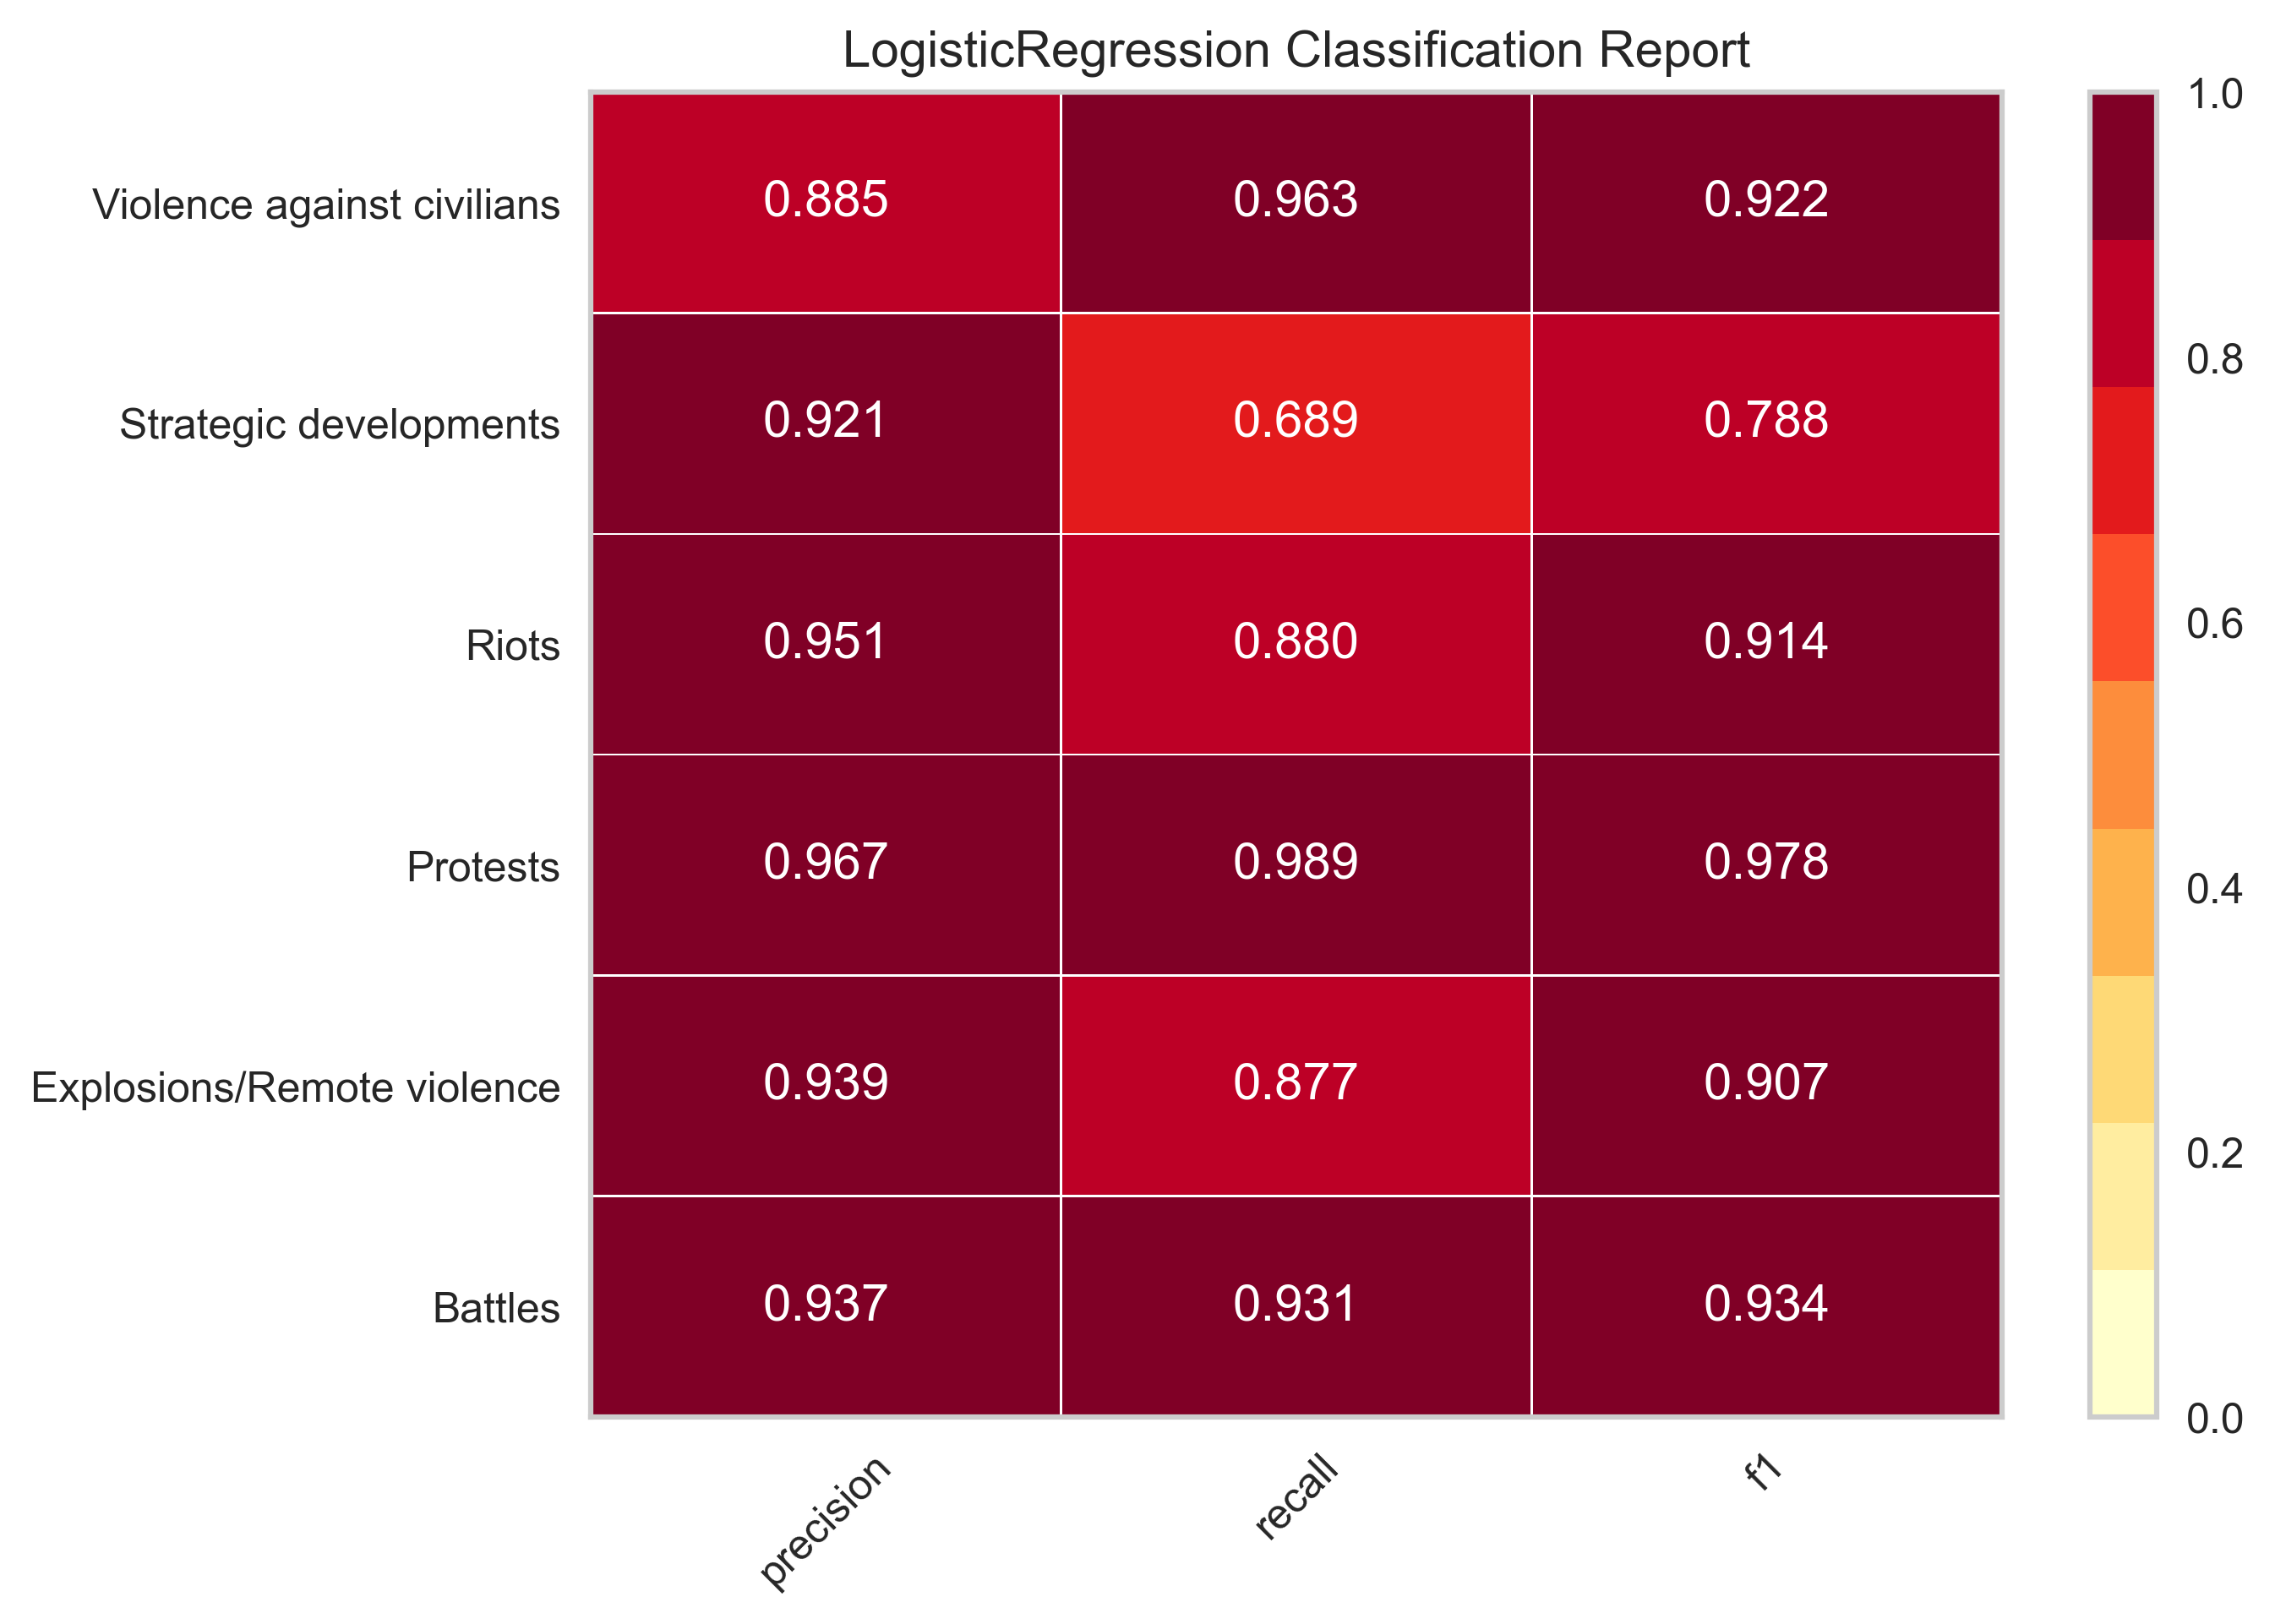

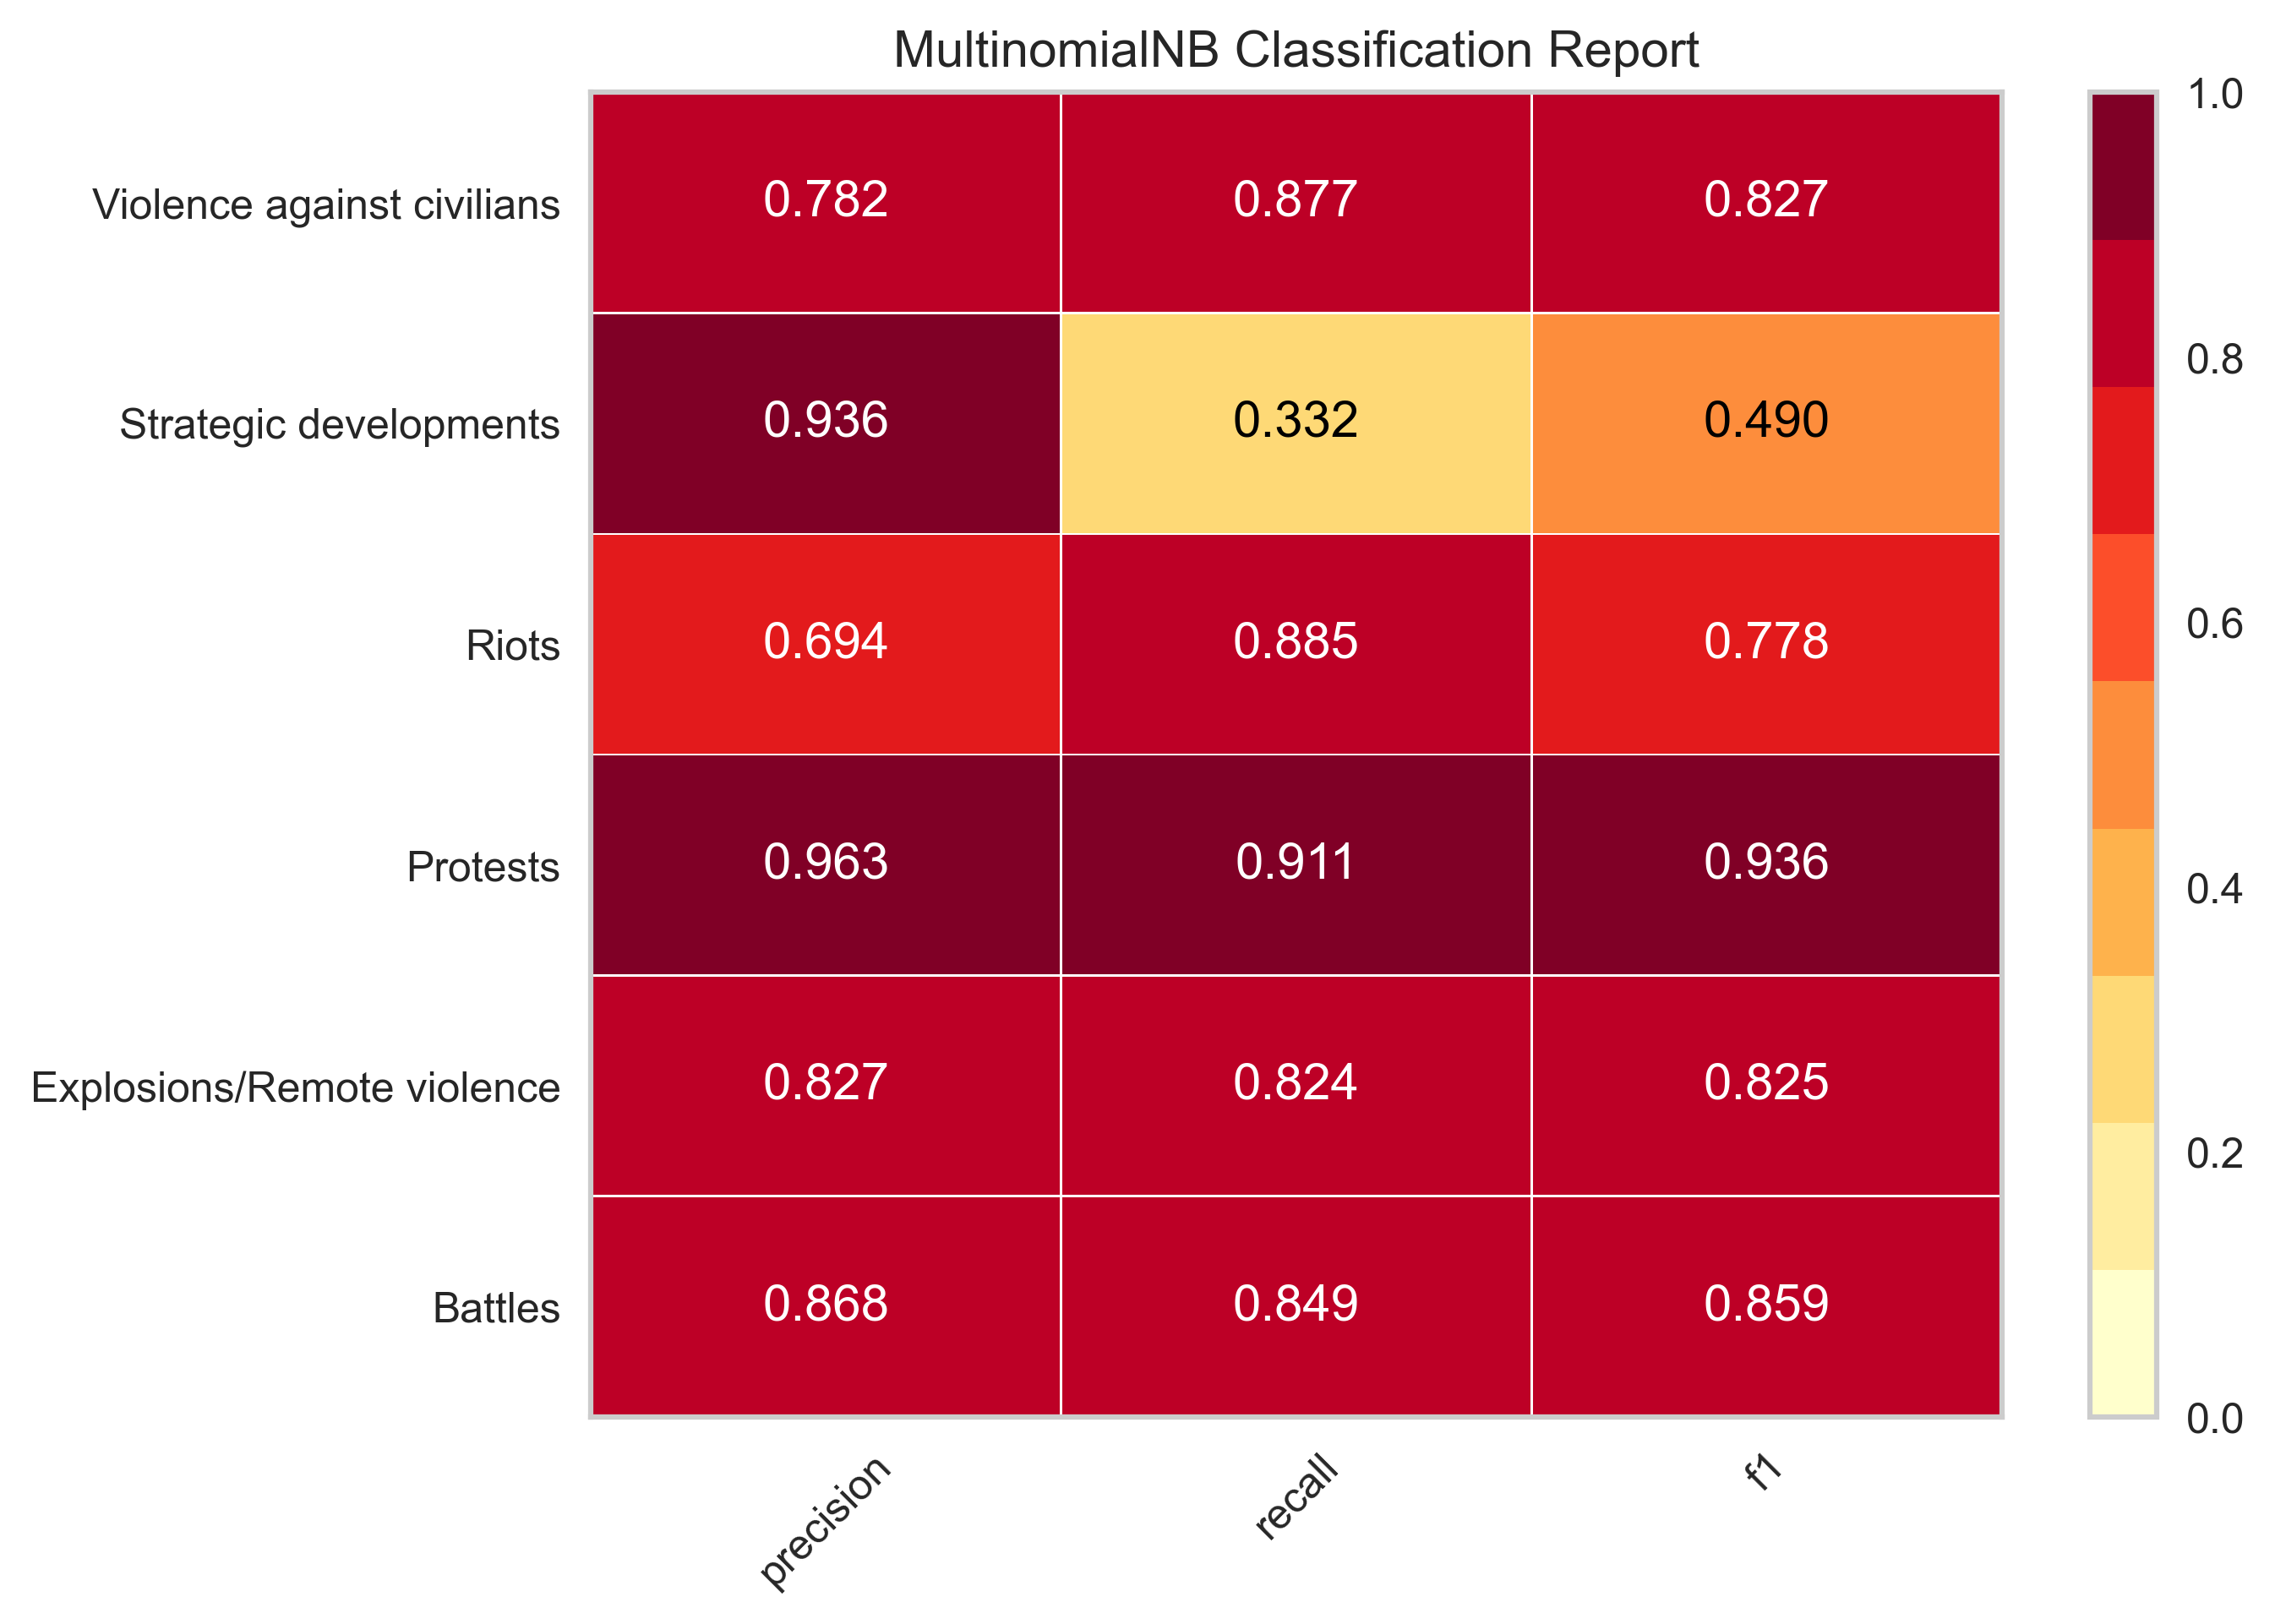

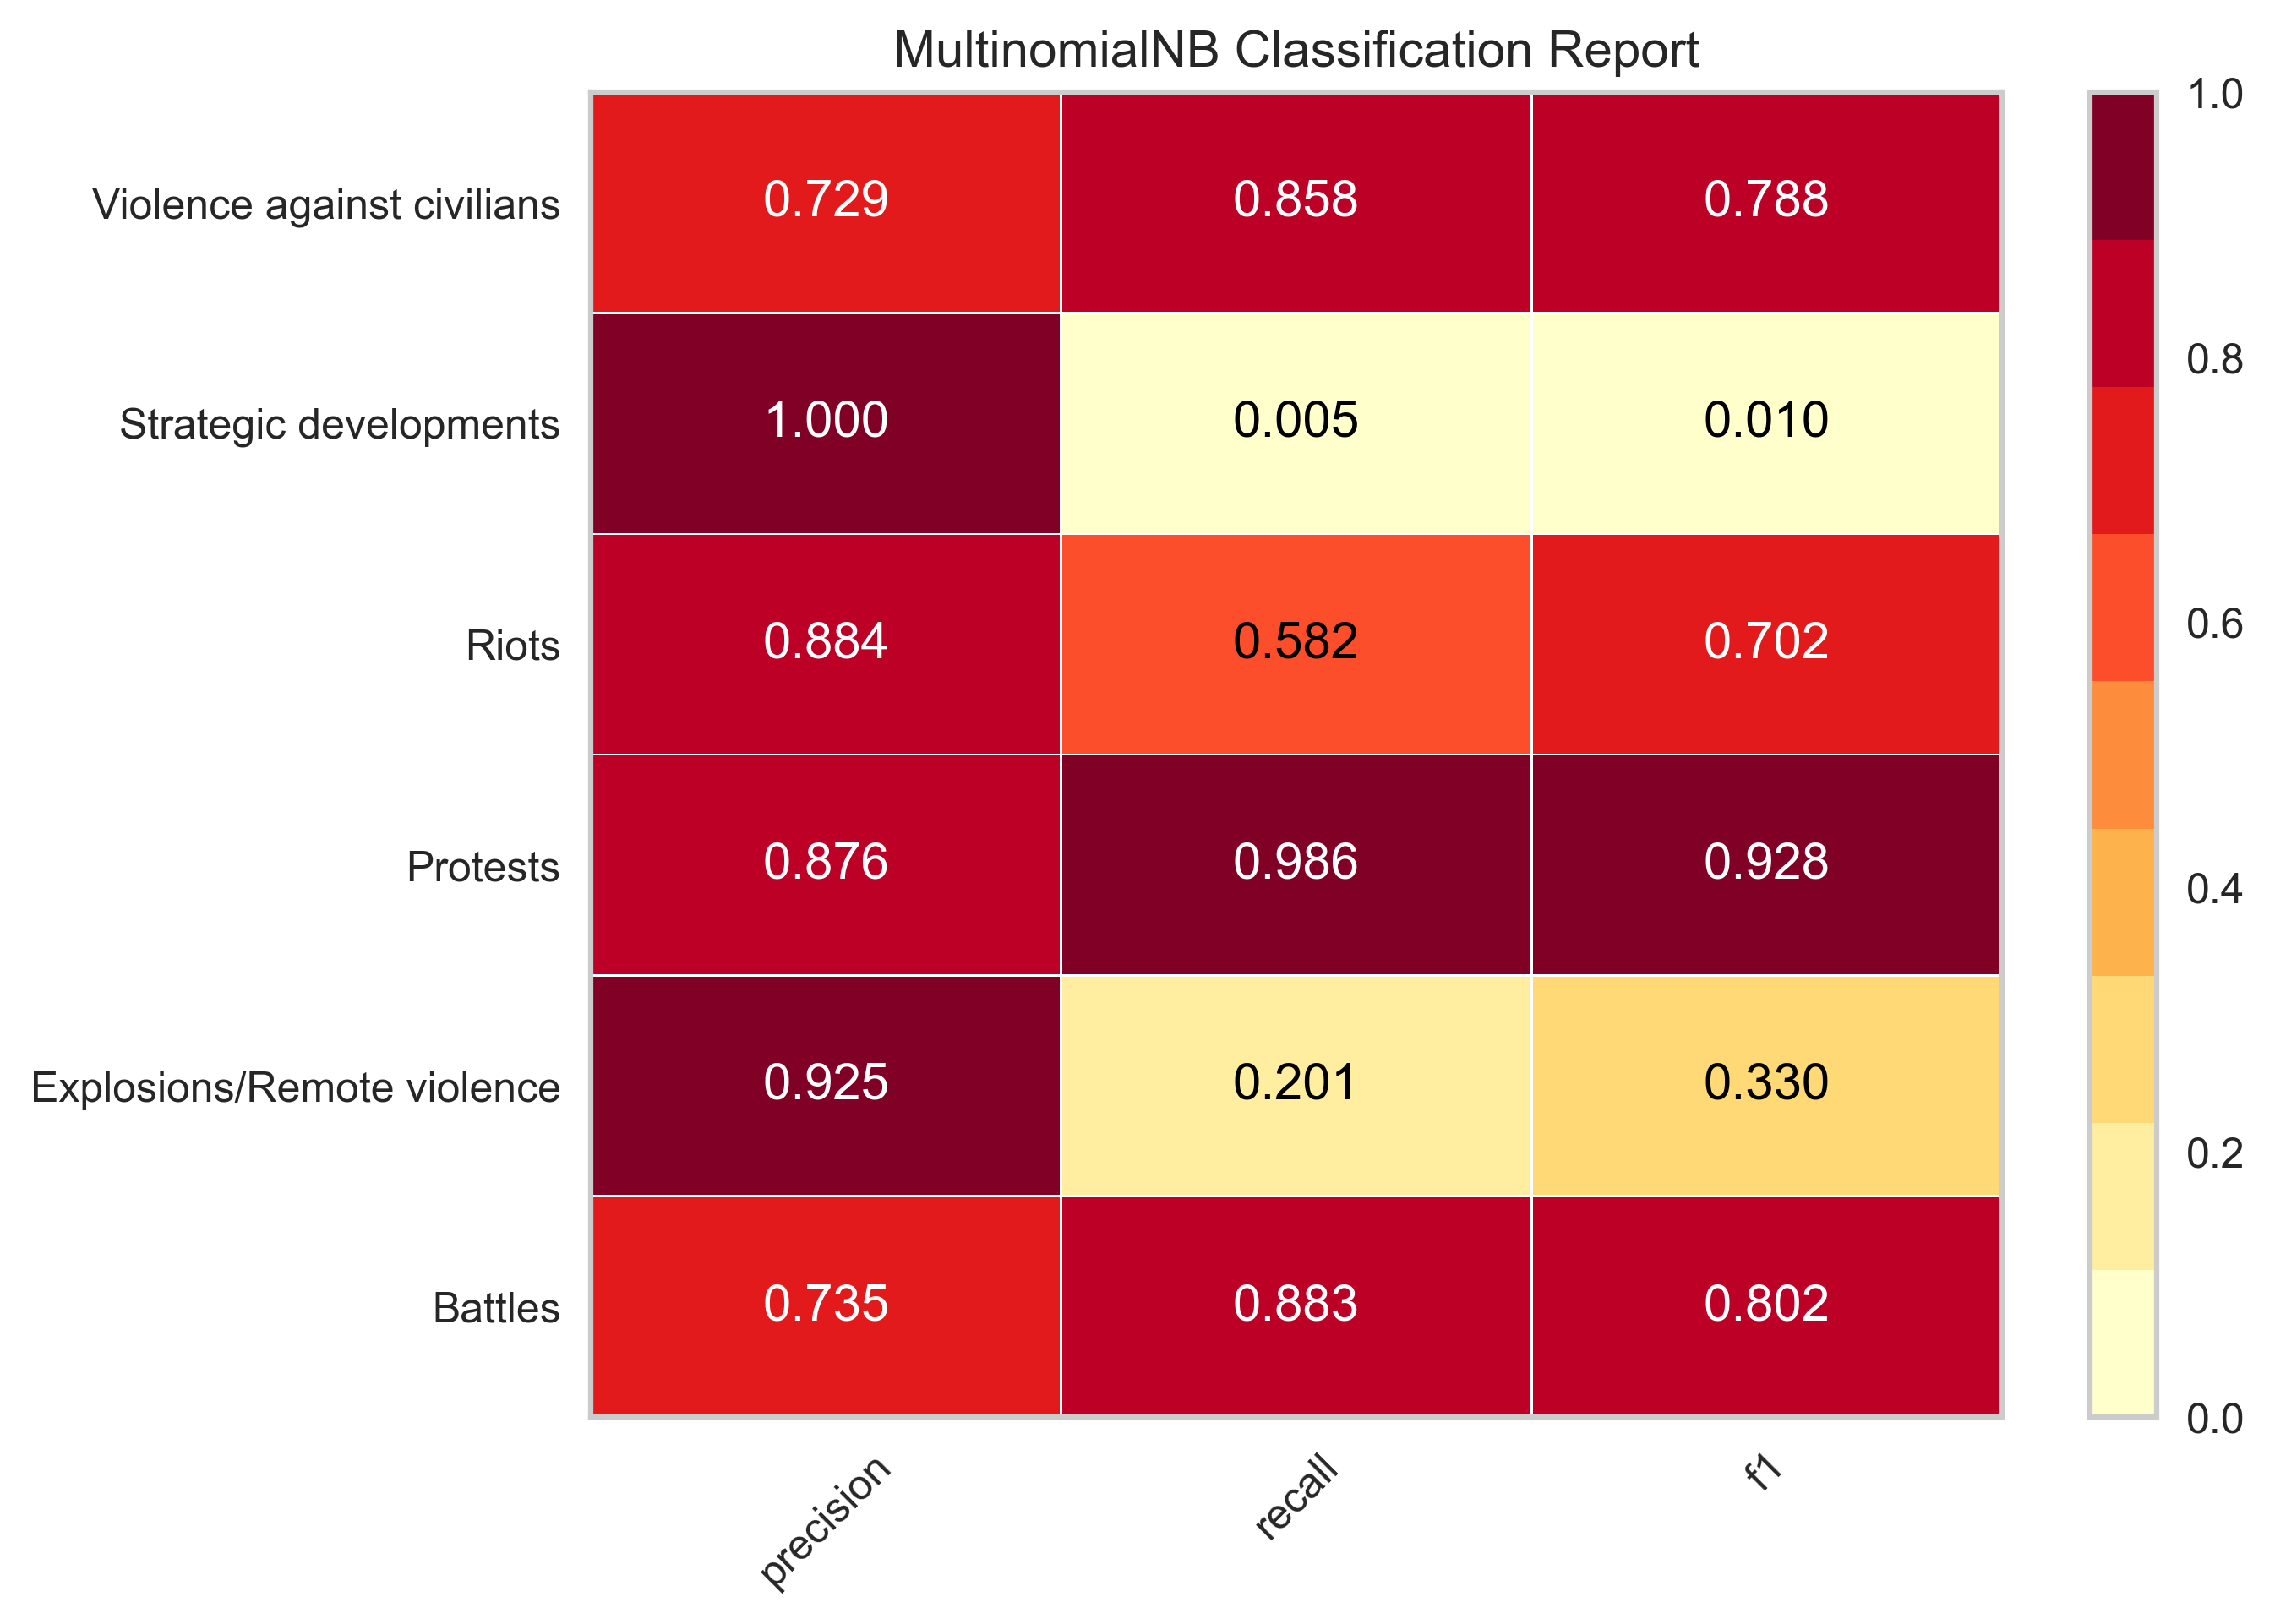

In [176]:
for algorithm in algorithms:
    for vectorizer in vectorizers:
        visualize_model(X, y, algorithm, vectorizer)

In [177]:
# Create class prediction error function

def evaluate_model(X, y, algorithm, vectorizer):
    """
    Evaluate various estimators.
    """
    model = Pipeline([
        ('vectorizer', vectorizer),
        ('estimator', algorithm)
    ])

  
    # split the data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.33, random_state=42
    )
    
# Instantiate the class prediction error and visualizer
    visualizer = ClassPredictionError(
        model, classes=encoder.classes_
    )

# Fit the training data to the visualizer
    visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
    visualizer.score(X_test, y_test)

# Draw visualization
    visualizer.show()

In [ ]:
for algorithm in algorithms:
    for vectorizer in vectorizers:
        evaluate_model(X, y, algorithm, vectorizer)

## 5.2 Topic Modeling - LDA <a class="anchor" id="5.2"></a>

In [249]:
import gensim
from gensim.utils import simple_preprocess
import gensim.corpora as corpora
from pprint import pprint

In [250]:
#convert sub-dataframes to lists for topic modeling
data_words_protests = list(df_protests['notes'])
data_words_riots = list(df_riots['notes']) 
data_words_battles = list(df_battles['notes'])
data_words_violence_civilians = list(df_violence_civilians['notes'])
data_words_explosions = list(df_explosions['notes'])
data_words_development = list(df_development['notes'])

In [251]:
data_words = list(df['notes'])
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# LDA model training
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.010*"group" + 0.010*"village" + 0.010*"around" + 0.010*"killed" + '
  '0.009*"police" + 0.009*"reported" + 0.009*"forces" + 0.008*"members" + '
  '0.007*"clashed" + 0.006*"town"'),
 (1,
  '0.014*"killed" + 0.012*"reported" + 0.010*"forces" + 0.009*"held" + '
  '0.009*"attacked" + 0.008*"village" + 0.008*"around" + 0.007*"sit" + '
  '0.006*"town" + 0.006*"fardc"'),
 (2,
  '0.011*"killed" + 0.010*"held" + 0.010*"town" + 0.009*"forces" + '
  '0.009*"village" + 0.008*"police" + 0.007*"sit" + 0.007*"group" + '
  '0.007*"cape" + 0.006*"around"'),
 (3,
  '0.011*"village" + 0.010*"lga" + 0.009*"killed" + 0.008*"attacked" + '
  '0.008*"killing" + 0.008*"police" + 0.007*"reported" + 0.007*"around" + '
  '0.006*"one" + 0.006*"two"'),
 (4,
  '0.012*"around" + 0.010*"reported" + 0.009*"forces" + 0.008*"village" + '
  '0.008*"fatalities" + 0.008*"police" + 0.007*"held" + 0.007*"demand" + '
  '0.007*"sit" + 0.006*"killed"'),
 (5,
  '0.014*"militants" + 0.014*"al" + 0.012*"village" + 0.011*"

### 5.2.1 Load in Topic Modeling visualization <a class="anchor" id="5.2.1"></a>

In [252]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
# Visualize the topics
pyLDAvis.enable_notebook()

In [253]:
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)

C:\Users\dhmph\AppData\Roaming\Python\Python37\site-packages\pyLDAvis\_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


In [254]:
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.063957  0.031925       1        1  13.198122
6     -0.041549  0.048927       2        1  12.710913
7     -0.078489 -0.039352       3        1  10.959673
3      0.043933 -0.027184       4        1  10.776157
0      0.006429  0.001162       5        1   9.367216
1      0.012818  0.016932       6        1   9.121577
4     -0.012414 -0.018018       7        1   8.840384
9     -0.005424 -0.031204       8        1   8.619281
8      0.034545 -0.036341       9        1   8.281854
2     -0.023806  0.053154      10        1   8.124823, topic_info=                    Term         Freq        Total Category  logprob  loglift
1167             ongoing  2417.000000  2417.000000  Default  30.0000  30.0000
2323            conflict  1666.000000  1666.000000  Default  29.0000  29.0000
51                police  5492.000000  5492.000000  Default  28.0000  28.0000
2540              tigray  1658.000000  1658.000000  Default  27.0000  27.0000
560                 mayi  1407.000000  1407.000000  Default  26.0000  26.0000
158                 held  3875.000000  3875.000000  Default  25.0000  25.0000
328                 cape  1376.000000  1376.000000  Default  24.0000  24.0000
20                    al  3377.000000  3377.000000  Default  23.0000  23.0000
252              shabaab  2149.000000  2149.000000  Default  22.0000  22.0000
199           government  2446.000000  2446.000000  Default  21.0000  21.0000
552                fardc  1783.000000  1783.000000  Default  20.0000  20.0000
447                 town  4377.000000  4377.000000  Default  19.0000  19.0000
296                  lga  3334.000000  3334.000000  Default  18.0000  18.0000
166                  sit  3284.000000  3284.000000  Default  17.0000  17.0000
3                   beni  1058.000000  1058.000000  Default  16.0000  16.0000
1               attacked  3830.000000  3830.000000  Default  15.0000  15.0000
5370            repeated  1045.000000  1045.000000  Default  14.0000  14.0000
17              reported  6371.000000  6371.000000  Default  13.0000  13.0000
516            locations  1197.000000  1197.000000  Default  12.0000  12.0000
253                  sna   791.000000   791.000000  Default  11.0000  11.0000
21                around  5759.000000  5759.000000  Default  10.0000  10.0000
1591            violence  1568.000000  1568.000000  Default   9.0000   9.0000
12879                nov   948.000000   948.000000  Default   8.0000   8.0000
250            militants  4845.000000  4845.000000  Default   7.0000   7.0000
160              members  2802.000000  2802.000000  Default   6.0000   6.0000
10                  kivu  2459.000000  2459.000000  Default   5.0000   5.0000
201               killed  6903.000000  6903.000000  Default   4.0000   4.0000
15                  nord  3005.000000  3005.000000  Default   3.0000   3.0000
8               injuries  2317.000000  2317.000000  Default   2.0000   2.0000
3545              mellal   234.000000   234.000000  Default   1.0000   1.0000
17702               ghat     5.902455     6.760703   Topic1  -9.7036   1.8893
12068            maghnia     4.626130     5.484289   Topic1  -9.9472   1.8549
10521               jiba     9.018058    10.854041   Topic1  -9.2797   1.8398
24488            mazouna     4.135817     4.993985   Topic1 -10.0593   1.8365
14733              tokar     4.135737     4.993891   Topic1 -10.0593   1.8365
10906           jilamari     4.481894     5.448293   Topic1  -9.9789   1.8298
4606            ouezzane    15.180561    18.511722   Topic1  -8.7589   1.8267
2141             umuahia    23.061583    28.263984   Topic1  -8.3408   1.8217
10523            nyeniza     8.817045    10.808619   Topic1  -9.3023   1.8214
9621            mahlangu     3.495455     4.353606   Topic1 -10.2275   1.8056
17173            akungba     3.493075     4.351221   Topic1 -10.2282   1.8054
21972              tifra     3.49

### 5.2.2 Protests LDA <a class="anchor" id="5.2.2"></a>

In [255]:
# Create Dictionary
id2word = corpora.Dictionary(data_words_protests)
# Create Corpus
texts = data_words_protests
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# LDA model training
# number of topics
num_topics = 10
# Build LDA model
lda_model_protests = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
vis = pyLDAvis.gensim_models.prepare(lda_model_protests, corpus, id2word)

C:\Users\dhmph\AppData\Roaming\Python\Python37\site-packages\pyLDAvis\_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


In [256]:
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.024102  0.033355       1        1  15.071114
4     -0.009612 -0.008081       2        1  13.228864
7     -0.046487 -0.045201       3        1  12.178556
0     -0.007795  0.020242       4        1  11.904704
6     -0.071966 -0.017194       5        1  10.436001
9      0.026046  0.030960       6        1  10.022427
1     -0.013006 -0.013841       7        1   7.357824
8      0.014858  0.053514       8        1   7.218385
2      0.059143  0.022961       9        1   6.817254
3      0.072920 -0.076716      10        1   5.764870, topic_info=                  Term         Freq        Total Category  logprob  loglift
207             police  1776.000000  1776.000000  Default  30.0000  30.0000
88              around  1437.000000  1437.000000  Default  29.0000  29.0000
183              hirak   735.000000   735.000000  Default  28.0000  28.0000
168       demonstrated  1651.000000  1651.000000  Default  27.0000  27.0000
129              state  1181.000000  1181.000000  Default  26.0000  26.0000
78              dozens  1654.000000  1654.000000  Default  25.0000  25.0000
399             health   914.000000   914.000000  Default  24.0000  24.0000
93             workers  1931.000000  1931.000000  Default  23.0000  23.0000
123                lga   759.000000   759.000000  Default  22.0000  22.0000
67            denounce  2393.000000  2393.000000  Default  21.0000  21.0000
111        coronavirus  1254.000000  1254.000000  Default  20.0000  20.0000
817           citizens  1237.000000  1237.000000  Default  19.0000  19.0000
472               town  1072.000000  1072.000000  Default  18.0000  18.0000
208          residents  1242.000000  1242.000000  Default  17.0000  17.0000
186                 th   516.000000   516.000000  Default  16.0000  16.0000
214      demonstrators   750.000000   750.000000  Default  15.0000  15.0000
73           protested  1434.000000  1434.000000  Default  14.0000  14.0000
875             staged   705.000000   705.000000  Default  13.0000  13.0000
436                 el  1008.000000  1008.000000  Default  12.0000  12.0000
706         protesters   713.000000   713.000000  Default  11.0000  11.0000
101               sidi   598.000000   598.000000  Default  10.0000  10.0000
5        demonstration  1479.000000  1479.000000  Default   9.0000   9.0000
1306        denouncing   668.000000   668.000000  Default   8.0000   8.0000
4               demand  2897.000000  2897.000000  Default   7.0000   7.0000
1776           siliana   137.000000   137.000000  Default   6.0000   6.0000
1142              beni   506.000000   506.000000  Default   5.0000   5.0000
11            hospital   471.000000   471.000000  Default   4.0000   4.0000
1976            sousse   236.000000   236.000000  Default   3.0000   3.0000
1061          kairouan   287.000000   287.000000  Default   2.0000   2.0000
38            reported   937.000000   937.000000  Default   1.0000   1.0000
4757              aids     5.986865     6.835031   Topic1  -8.6740   1.7599
11491            botma     4.816223     5.664347   Topic1  -8.8916   1.7302
1145         ourtilane    66.941270    81.257723   Topic1  -6.2597   1.6986
8004     understanding    17.372059    21.255200   Topic1  -7.6087   1.6907
13426         laikipia     3.644348     4.492456   Topic1  -9.1704   1.6832
2395              upnd     3.641853     4.489958   Topic1  -9.1711   1.6830
1362             sheko     3.640269     4.488389   Topic1  -9.1715   1.6830
4248          teveritt     8.918718    11.173421   Topic1  -8.2754   1.6670
1144        ouartilane     7.168595     9.013176   Topic1  -8.4939   1.6634
7817           joining     6.967523     8.803607   Topic1  -8.5223   1.6585
437           kankossa     5.955216     7.624058   Topic1  -8.6793   1.6453
4038          marlboro     3.458575     4.430008   Topic1  -9.2227   1.6448
5972             mekla     5.989570     7

### 5.2.3 Violence against Civilians LDA <a class="anchor" id="5.2.3"></a>

In [273]:
# Create Dictionary
id2word = corpora.Dictionary(data_words_protests)
# Create Corpus
texts = data_words_violence_civilians
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# LDA model training
# number of topics
num_topics = 5
# Build LDA model
lda_model_violence_civilians = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
vis = pyLDAvis.gensim_models.prepare(lda_model_violence_civilians, corpus, id2word)

C:\Users\dhmph\AppData\Roaming\Python\Python37\site-packages\pyLDAvis\_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


In [274]:
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.004884  0.021944       1        1  25.282712
1     -0.044039  0.020786       2        1  24.182285
3     -0.020411 -0.021759       3        1  23.743093
2      0.012197 -0.038595       4        1  15.982011
4      0.047368  0.017624       5        1  10.809899, topic_info=               Term         Freq        Total Category  logprob  loglift
523          killed  2496.000000  2496.000000  Default  30.0000  30.0000
35             near   787.000000   787.000000  Default  29.0000  29.0000
3396         gunmen   770.000000   770.000000  Default  28.0000  28.0000
4376     reportedly   358.000000   358.000000  Default  27.0000  27.0000
13365          boko   337.000000   337.000000  Default  26.0000  26.0000
38         reported  1090.000000  1090.000000  Default  25.0000  25.0000
88           around  1128.000000  1128.000000  Default  24.0000  24.0000
71             nord   884.000000   884.000000  Default  23.0000  23.0000
472            town   775.000000   775.000000  Default  22.0000  22.0000
2354          haram   337.000000   337.000000  Default  21.0000  21.0000
916             one   815.000000   815.000000  Default  20.0000  20.0000
123             lga   966.000000   966.000000  Default  19.0000  19.0000
42          unknown  1073.000000  1073.000000  Default  18.0000  18.0000
309         killing   662.000000   662.000000  Default  17.0000  17.0000
129           state   792.000000   792.000000  Default  16.0000  16.0000
501       suspected   635.000000   635.000000  Default  15.0000  15.0000
623            shot   979.000000   979.000000  Default  14.0000  14.0000
1057       attacked  1910.000000  1910.000000  Default  13.0000  13.0000
11442         diffa   154.000000   154.000000  Default  12.0000  12.0000
1615            men   768.000000   768.000000  Default  11.0000  11.0000
1934           mayo   188.000000   188.000000  Default  10.0000  10.0000
2253        wounded   331.000000   331.000000  Default   9.0000   9.0000
1938           sava   133.000000   133.000000  Default   8.0000   8.0000
500     separatists   222.000000   222.000000  Default   7.0000   7.0000
1932        extreme   208.000000   208.000000  Default   6.0000   6.0000
2140        vehicle   199.000000   199.000000  Default   5.0000   5.0000
8707        katsina   171.000000   171.000000  Default   4.0000   4.0000
3031            gao   167.000000   167.000000  Default   3.0000   3.0000
475            clan   184.000000   184.000000  Default   2.0000   2.0000
2376          mopti   228.000000   228.000000  Default   1.0000   1.0000
9982          jilib     9.441031    10.145635   Topic1  -8.0603   1.3031
5243         niamey     5.723615     6.437140   Topic1  -8.5607   1.2576
752          coptic     6.932068     8.171404   Topic1  -8.3692   1.2106
2652         katima     3.888484     4.587532   Topic1  -8.9473   1.2097
2653         mulilo     3.884935     4.585349   Topic1  -8.9482   1.2093
1034           ijaw     4.482094     5.503357   Topic1  -8.8053   1.1698
7905         maroua     2.961282     3.659839   Topic1  -9.2197   1.1633
7310         doolow     2.960428     3.659193   Topic1  -9.2200   1.1631
9967           tema     2.961327     3.660483   Topic1  -9.2197   1.1631
178       okitipupa     2.960669     3.659752   Topic1  -9.2199   1.1631
14012          burj     2.959940     3.658998   Topic1  -9.2202   1.1630
1773           sfax     2.959031     3.658686   Topic1  -9.2205   1.1628
1820         maseru     2.959337     3.659921   Topic1  -9.2204   1.1626
11659        iganga     2.957736     3.658161   Topic1  -9.2209   1.1625
7632           meru     2.957214     3.658649   Topic1  -9.2211   1.1622
1774          ville     2.958379     3.660493   Topic1  -9.2207   1.1621
4433   matabeleland     3.701649     4.583652   Topic1  -8.9966   1.1613
7533          arish    10.346153    12.818363   Topic1  -7.9687   1.1608
39

### 5.2.4 Battles LDA <a class="anchor" id="5.2.4"></a>

In [261]:
# Create Dictionary
id2word = corpora.Dictionary(data_words_battles)
# Create Corpus
texts = data_words_battles
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# LDA model training
# number of topics
num_topics = 5
# Build LDA model
lda_model_battles = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
vis = pyLDAvis.gensim_models.prepare(lda_model_battles, corpus, id2word)

C:\Users\dhmph\AppData\Roaming\Python\Python37\site-packages\pyLDAvis\_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


In [262]:
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.091841 -0.017881       1        1  24.055906
1      0.089103 -0.060609       2        1  20.966422
3      0.049574  0.057668       3        1  20.294426
2      0.033607  0.022572       4        1  18.575887
0     -0.080443 -0.001750       5        1  16.107360, topic_info=               Term         Freq        Total Category  logprob  loglift
3573        ongoing  1587.000000  1587.000000  Default  30.0000  30.0000
1595       conflict  1228.000000  1228.000000  Default  29.0000  29.0000
731          tigray  1221.000000  1221.000000  Default  28.0000  28.0000
4471       repeated   813.000000   813.000000  Default  27.0000  27.0000
557        violence   840.000000   840.000000  Default  26.0000  26.0000
51            lower   703.000000   703.000000  Default  25.0000  25.0000
4469            nov   735.000000   735.000000  Default  24.0000  24.0000
54         shabelle   576.000000   576.000000  Default  23.0000  23.0000
93        locations   894.000000   894.000000  Default  22.0000  22.0000
45              sna   551.000000   551.000000  Default  21.0000  21.0000
25       government   821.000000   821.000000  Default  20.0000  20.0000
43         security  1067.000000  1067.000000  Default  19.0000  19.0000
44          shabaab  1451.000000  1451.000000  Default  18.0000  18.0000
35               al  1612.000000  1612.000000  Default  17.0000  17.0000
228           fardc  1689.000000  1689.000000  Default  16.0000  16.0000
386          rebels   745.000000   745.000000  Default  15.0000  15.0000
3028          field   401.000000   401.000000  Default  14.0000  14.0000
2              base   656.000000   656.000000  Default  13.0000  13.0000
4464          early   420.000000   420.000000  Default  12.0000  12.0000
4460       affected   405.000000   405.000000  Default  11.0000  11.0000
4475       tigrayan   415.000000   415.000000  Default  10.0000  10.0000
4470     occurrence   406.000000   406.000000  Default   9.0000   9.0000
4473    represented   390.000000   390.000000  Default   8.0000   8.0000
4476            via   390.000000   390.000000  Default   7.0000   7.0000
4465            edf   394.000000   394.000000  Default   6.0000   6.0000
4467     interviews   386.000000   386.000000  Default   5.0000   5.0000
4474            tdf   401.000000   401.000000  Default   4.0000   4.0000
56          afgooye   246.000000   246.000000  Default   3.0000   3.0000
4463      discerned   386.000000   386.000000  Default   2.0000   2.0000
8          injuries  1470.000000  1470.000000  Default   1.0000   1.0000
2660          nokou     5.823490     6.671381   Topic1  -8.9945   1.2889
5256        calabar     4.653382     5.564425   Topic1  -9.2188   1.2460
8873         tunbun     5.581961     6.704278   Topic1  -9.0369   1.2416
5060          kaiga     4.580873     5.523583   Topic1  -9.2345   1.2377
5960      casamance     5.530786     6.749224   Topic1  -9.0461   1.2257
2351        goronyo     3.592229     4.424573   Topic1  -9.4776   1.2164
354            beri     3.593740     4.426764   Topic1  -9.4772   1.2163
2688      bamboutos     3.590891     4.424305   Topic1  -9.4780   1.2161
9374         komala     3.590502     4.424136   Topic1  -9.4781   1.2160
3961         fitili     3.572185     4.419563   Topic1  -9.4832   1.2119
2659          kanem    18.840046    23.648649   Topic1  -7.8204   1.1975
1994       kifuafua     3.418847     4.327032   Topic1  -9.5271   1.1892
2734        strikes     4.328260     5.481161   Topic1  -9.2913   1.1886
2136        niaguis     5.879736     7.461650   Topic1  -8.9849   1.1865
1401        nangade    15.255014    19.890508   Topic1  -8.0315   1.1595
851      ziguinchor     9.170992    11.975609   Topic1  -8.5404   1.1580
6292           tiko     3.234625     4.223902   Topic1  -9.5825   1.1579
7448         munuki     4.284165     5.606936   Topic1  -9.3015   1.1557
14

### 5.2.5 Riots LDA <a class="anchor" id="5.2.5"></a>

In [267]:
# Create Dictionary
id2word = corpora.Dictionary(data_words_riots)
# Create Corpus
texts = data_words_riots
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# LDA model training
# number of topics
num_topics = 20
# Build LDA model
lda_model_riots = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
vis = pyLDAvis.gensim_models.prepare(lda_model_riots, corpus, id2word)

C:\Users\dhmph\AppData\Roaming\Python\Python37\site-packages\pyLDAvis\_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


In [268]:
vis

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
8     -0.028699 -0.033116       1        1  8.330353
7     -0.023029  0.004344       2        1  8.171693
17    -0.021871 -0.042169       3        1  7.941610
6     -0.004023 -0.000618       4        1  6.741181
16    -0.001137  0.006258       5        1  6.663089
3      0.047705 -0.037063       6        1  6.185742
1     -0.010457  0.032473       7        1  5.548948
9      0.055775  0.030323       8        1  5.547890
10     0.055753 -0.114242       9        1  5.004904
13    -0.079544 -0.027166      10        1  4.964700
19     0.043457  0.016220      11        1  4.887210
12    -0.036331  0.020451      12        1  4.772434
5     -0.104770 -0.038983      13        1  4.341641
0      0.012610  0.008158      14        1  3.830621
18     0.031544  0.013871      15        1  3.586505
15    -0.041995  0.020271      16        1  3.113245
2      0.094932 -0.022396      17        1  2.984532
14     0.004472  0.039980      18        1  2.867515
11     0.016407  0.088276      19        1  2.510475
4     -0.010799  0.035127      20        1  2.005713, topic_info=                   Term         Freq        Total Category  logprob  loglift
67               forces   876.000000   876.000000  Default  30.0000  30.0000
7                 group  1067.000000  1067.000000  Default  29.0000  29.0000
413             abidjan   146.000000   146.000000  Default  28.0000  28.0000
104                 man   458.000000   458.000000  Default  27.0000  27.0000
276              killed   525.000000   525.000000  Default  26.0000  26.0000
96                 cape   416.000000   416.000000  Default  25.0000  25.0000
216              people   729.000000   729.000000  Default  24.0000  24.0000
295        demonstrated   603.000000   603.000000  Default  23.0000  23.0000
160             members   426.000000   426.000000  Default  22.0000  22.0000
36        demonstrators  1053.000000  1053.000000  Default  21.0000  21.0000
568           community   242.000000   242.000000  Default  20.0000  20.0000
225          barricaded   537.000000   537.000000  Default  19.0000  19.0000
277                kivu   245.000000   245.000000  Default  18.0000  18.0000
129           residents   769.000000   769.000000  Default  17.0000  17.0000
132                town   770.000000   770.000000  Default  16.0000  16.0000
5244              voice    99.000000    99.000000  Default  15.0000  15.0000
164               party   285.000000   285.000000  Default  14.0000  14.0000
65              clashed   527.000000   527.000000  Default  13.0000  13.0000
82              gauteng   186.000000   186.000000  Default  12.0000  12.0000
286               burnt   282.000000   282.000000  Default  11.0000  11.0000
223             village   468.000000   468.000000  Default  10.0000  10.0000
59             reported   532.000000   532.000000  Default   9.0000   9.0000
2859         grievances   100.000000   100.000000  Default   8.0000   8.0000
318                 lga   250.000000   250.000000  Default   7.0000   7.0000
1183             likely   103.000000   103.000000  Default   6.0000   6.0000
226             burning   492.000000   492.000000  Default   5.0000   5.0000
4964              socio   103.000000   103.000000  Default   4.0000   4.0000
298                 mob   349.000000   349.000000  Default   3.0000   3.0000
582              issues    80.000000    80.000000  Default   2.0000   2.0000
381                 one   356.000000   356.000000  Default   1.0000   1.0000
2558              burco     3.526112     4.407244   Topic1  -7.7301   2.2622
5879           shinkafi     2.656746     3.537829   Topic1  -8.0132   2.1989
4408            bukedea     2.656671     3.537755   Topic1  -8.0132   2.1988
8148           benghazi     4.397394     6.143725   Topic1  -7.5092   2.1508
1398              saada     1.785858     2.666947   Topic1  -8.4104   2.0842
8120               

# 6. Reporting and Visualization <a class="anchor" id="6"></a>

## 6.1 Findings <a class="anchor" id="6.1"></a>

Based on the findings of running through the classification models (Model 1): 
* ACLED researchers codify their notes and their events accurately. 
* The creation of sub-events is more difficult, and lowers precision, but new sub-event types codified will increase the precision over-time.
* Regions vastly change the precision/recall of models and the clusters because the reigonal context changes drastically.

## 6.2 Recommendations <a class="anchor" id="6.2"></a>

* Creation of new subtypes
    * Violence Against Minorities
    * Protests Against the State
    * COVID/Antilockdown Protests

## 6.3 Lessons Learned <a class="anchor" id="6.3"></a>

* Researching Methodologies before experimenting
* Exploring what model works best for the problem we're trying to solve
* Adding comments when approriate

* Experimenting with other regions to compare models and feature differences
* Experimenting with other features such as fatalities or other data
* Finishing Model 3, using the first classification model that is supervised and adding in the second topic model to create a third one.